# Telecom Data Analysis & Insights 

## TELECOMUNICACIONES: IDENTIFICAR OPERADORES INEFICIENTES

## Problema de Negocio

El performance de los operadores de telecom impacta a la satsifaccion del cleinte asi como en costos operacionales.
Objetivo: Identificar a los operadores mas inefcientes basandonos en su comportamiento y KPI's de desempeño

## Approach
1. Limpieza de los datos
2. Data engineering
3. Analisis exploratorio 
4. Modelo de inefficiencia
5. Testeo estadistico

## Outcome
- Se identificaron 98% de operadores ineficientes
- Key drivers: Tiempo de respuesta, dias activos, distribucion de llamadas


## PRESENTACION

https://drive.google.com/file/d/1q9Ps-0RlLKEA8g3GZs8mOIOk3FQqQaLD/view?usp=sharing

## LIBRERIAS

In [1]:
# CARGAR LAS LIBRERIAS A UTILIZAR 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## 1. CALIDAD DE DATOS

En este campo prepararemos los datos para el EDA mediante el analisis de la calidad de estos, comenzando con la validacion de los archivos, utilizado 'info()'' para poder determinar si tenemos algun valor que este ausente, o duplicado, de igual manera buscamos encontrar los datos unicos y ver de que manera cada uno impacta el DF

### 1.1 LECTURA DE ARCHIVOS

In [2]:
#Lectura y validacion de los archivos 
telecom_client = pd.read_csv(r'/Users/sulomon/pryct7_cars/ZUREPO/AUTOMATIX/PROYECTO FINAL/TELECOM/telecom_clients.csv')
telecom_data= pd.read_csv(r'/Users/sulomon/pryct7_cars/ZUREPO/AUTOMATIX/PROYECTO FINAL/TELECOM/telecom_dataset_new.csv')

#Imprimir info
print(telecom_data.sample(5))
print()
print(telecom_client.sample(5))

       user_id                       date direction internal  operator_id  \
24475   167110  2019-09-10 00:00:00+03:00       out    False     907998.0   
30758   167359  2019-10-29 00:00:00+03:00       out    False     920146.0   
36360   167626  2019-09-26 00:00:00+03:00       out    False     919202.0   
32782   167471  2019-11-26 00:00:00+03:00       out     True     944648.0   
17188   166916  2019-11-21 00:00:00+03:00       out     True     906398.0   

       is_missed_call  calls_count  call_duration  total_call_duration  
24475           False            2             23                   49  
30758            True            1              0                    5  
36360            True           44              0                 1088  
32782            True            1              0                    0  
17188           False            1             57                   70  

     user_id tariff_plan  date_start
144   168264           C  2019-10-18
495   168550           B

### 1.2  TELECOM CLIENTS

Este apartado unicamente se analiza la calidad de los datos para el DF de telecom_cients

#### 1.2.1 PASAR DATOS A DATETIME

In [3]:
#Pasar a Dtime
telecom_client['date_start'] = pd.to_datetime(telecom_client['date_start'])

#Mostrar datos
telecom_client.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      732 non-null    int64         
 1   tariff_plan  732 non-null    object        
 2   date_start   732 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 17.3+ KB


#### 1.2.2 EXPLORACION DE DATOS UNICOS 

In [4]:
#Unique para poder analizar aquellas columnas que nos puedan ayudar a generar clasificaciones y parametros dentro del DF y Nunique para poder contabilizar los conjuntos de datos grandes como user_id y operator_id
print('Conteo de usuarios unicos:',telecom_client['user_id'].nunique())
print('Tipos de tarifa por plan en DF:', telecom_client['tariff_plan'].unique())
print('Conteo de de fechas unicas:' , telecom_client['date_start'].nunique())
print('Unicos de fecha:' , telecom_client['date_start'].unique())

Conteo de usuarios unicos: 732
Tipos de tarifa por plan en DF: ['A' 'C' 'B']
Conteo de de fechas unicas: 73
Unicos de fecha: <DatetimeArray>
['2019-08-15 00:00:00', '2019-08-23 00:00:00', '2019-10-29 00:00:00',
 '2019-09-01 00:00:00', '2019-10-16 00:00:00', '2019-09-30 00:00:00',
 '2019-08-29 00:00:00', '2019-10-17 00:00:00', '2019-10-28 00:00:00',
 '2019-10-03 00:00:00', '2019-10-31 00:00:00', '2019-08-12 00:00:00',
 '2019-09-19 00:00:00', '2019-10-23 00:00:00', '2019-10-20 00:00:00',
 '2019-10-24 00:00:00', '2019-10-18 00:00:00', '2019-10-11 00:00:00',
 '2019-10-10 00:00:00', '2019-10-02 00:00:00', '2019-10-21 00:00:00',
 '2019-10-14 00:00:00', '2019-10-07 00:00:00', '2019-10-01 00:00:00',
 '2019-09-24 00:00:00', '2019-09-18 00:00:00', '2019-08-22 00:00:00',
 '2019-08-05 00:00:00', '2019-08-07 00:00:00', '2019-08-20 00:00:00',
 '2019-09-05 00:00:00', '2019-10-26 00:00:00', '2019-09-10 00:00:00',
 '2019-08-30 00:00:00', '2019-08-26 00:00:00', '2019-08-16 00:00:00',
 '2019-08-09 00:00:

#### 1.2.3 EXPLORACION DE NAN

In [5]:
telecom_client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      732 non-null    int64         
 1   tariff_plan  732 non-null    object        
 2   date_start   732 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 17.3+ KB


In [6]:
#Usar isna() y posteriormente dropna() para poder tener un DF lo mas limpio posible+
print('ID usuarios NA:',telecom_client['user_id'].isna())
print('Tariff en NAN:', telecom_client['tariff_plan'].isna())
print('Fechas en NAN:' , telecom_client['date_start'].isna())

ID usuarios NA: 0      False
1      False
2      False
3      False
4      False
       ...  
727    False
728    False
729    False
730    False
731    False
Name: user_id, Length: 732, dtype: bool
Tariff en NAN: 0      False
1      False
2      False
3      False
4      False
       ...  
727    False
728    False
729    False
730    False
731    False
Name: tariff_plan, Length: 732, dtype: bool
Fechas en NAN: 0      False
1      False
2      False
3      False
4      False
       ...  
727    False
728    False
729    False
730    False
731    False
Name: date_start, Length: 732, dtype: bool


#### 1.2.4 EXPLORACION DE DATOS DUPLICADOS

In [7]:
#Usar dupplicate y posteriormente dropdupplicate para poder deshacernos de los datos duplicados, esto no sin antes haber validado la duplicidad 
print('Conteo de enentradas duplicadas:',telecom_client[telecom_client.duplicated()].count())


Conteo de enentradas duplicadas: user_id        0
tariff_plan    0
date_start     0
dtype: int64


In [8]:
telecom_client.sample(5)

,user_id,tariff_plan,date_start
709,166958,B,2019-08-26
609,167176,B,2019-09-05
415,167042,C,2019-08-29
401,167704,C,2019-09-26
117,167441,C,2019-09-17


#### 1.2.5 EXPLORACIOND DE FECHAS

In [9]:
print('Rango de fechas:', telecom_client['date_start'].min(),'-',telecom_client['date_start'].max())
cantidad_dias = (telecom_client['date_start'].max()- telecom_client['date_start'].min()).days
print('Cantidad de días dentro del periodo estudiado:', cantidad_dias)
print('Conteo de de fechas unicas:' , telecom_client['date_start'].nunique())


Rango de fechas: 2019-08-01 00:00:00 - 2019-10-31 00:00:00
Cantidad de días dentro del periodo estudiado: 91
Conteo de de fechas unicas: 73


EL analisis inc
ial para los datos de telecom_clients, nos muestra que estamos analizando 732 clientes que se dividen en 3 planes de pago, y dentro de un periodo de afiliacion de 91 dias.

### 1.3 TELECOM DATA

Este apartado unicamente se analiza la calidad de los datos para el DF telecom_data

In [10]:
telecom_data.describe()

,user_id,operator_id,calls_count,call_duration,total_call_duration
count,53902.000000,45730.000000,53902.000000,53902.000000,53902.000000
mean,167295.344477,916535.993002,16.451245,866.684427,1157.133297
std,598.883775,21254.123136,62.917170,3731.791202,4403.468763
min,166377.000000,879896.000000,1.000000,0.000000,0.000000
25%,166782.000000,900788.000000,1.000000,0.000000,47.000000
50%,167162.000000,913938.000000,4.000000,38.000000,210.000000
75%,167819.000000,937708.000000,12.000000,572.000000,902.000000
max,168606.000000,973286.000000,4817.000000,144395.000000,166155.000000


#### 1.3.1 PASAR DATOS A DATETIME

In [11]:
#Pasar a Dtime
telecom_data['date'] = pd.to_datetime(telecom_data['date'])
#Mostrar datos
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype                    
---  ------               --------------  -----                    
 0   user_id              53902 non-null  int64                    
 1   date                 53902 non-null  datetime64[ns, UTC+03:00]
 2   direction            53902 non-null  object                   
 3   internal             53785 non-null  object                   
 4   operator_id          45730 non-null  float64                  
 5   is_missed_call       53902 non-null  bool                     
 6   calls_count          53902 non-null  int64                    
 7   call_duration        53902 non-null  int64                    
 8   total_call_duration  53902 non-null  int64                    
dtypes: bool(1), datetime64[ns, UTC+03:00](1), float64(1), int64(4), object(2)
memory usage: 3.3+ MB


#### 1.3.2 EXPLORACION DE DATOS UNICOS 

In [12]:
#Unique para poder analizar aquellas columnas que nos puedan ayudar a generar clasificaciones y parametros dentro del DF y Nunique para poder contabilizar los conjuntos de datos grandes como user_id y operator_id
#Exploracion de datos unicos
print('Conteo de usuarios unicos:',telecom_data['user_id'].nunique())
print('Conteo de operadores unicos:', telecom_data['operator_id'].nunique())
print('Direccion unica de la llamda:', telecom_data['direction'].unique())
print('Unicos de internal:', telecom_data['internal'].unique())
print('Unico de llamada perdida:', telecom_data['is_missed_call'].unique())
print('Ultima fecha de llamada de DF completo:', telecom_data['date'].max())
print('Primera fecha de llamada de DF completo:', telecom_data['date'].min())


Conteo de usuarios unicos: 307
Conteo de operadores unicos: 1092
Direccion unica de la llamda: ['in' 'out']
Unicos de internal: [False True nan]
Unico de llamada perdida: [ True False]
Ultima fecha de llamada de DF completo: 2019-11-28 00:00:00+03:00
Primera fecha de llamada de DF completo: 2019-08-02 00:00:00+03:00


#### 1.3.3 EXPLORACION DE NAN

In [13]:
#Usar isna() y posteriormente dorpna() para poder tener un DF lo mas limpio posible
print('Entradas faltantes de id de operador:',telecom_data['operator_id'].isna().sum())
print('Entradas faltantes de internal:',telecom_data['internal'].isna().sum())

Entradas faltantes de id de operador: 8172
Entradas faltantes de internal: 117


In [14]:
print(telecom_data[telecom_data['user_id']==168024])
print(telecom_data[telecom_data['user_id']==168024].shape)

       user_id                      date direction internal  operator_id  \
44178   168024 2019-10-12 00:00:00+03:00        in    False          NaN   
44179   168024 2019-10-12 00:00:00+03:00        in    False          NaN   
44180   168024 2019-10-13 00:00:00+03:00        in    False          NaN   
44181   168024 2019-10-14 00:00:00+03:00        in    False          NaN   
44182   168024 2019-10-15 00:00:00+03:00        in    False          NaN   
44183   168024 2019-10-16 00:00:00+03:00        in    False          NaN   
44184   168024 2019-10-18 00:00:00+03:00        in    False          NaN   
44185   168024 2019-10-19 00:00:00+03:00        in    False          NaN   
44186   168024 2019-10-22 00:00:00+03:00        in    False          NaN   
44187   168024 2019-10-23 00:00:00+03:00        in    False          NaN   
44188   168024 2019-10-28 00:00:00+03:00        in    False          NaN   
44189   168024 2019-10-29 00:00:00+03:00        in    False          NaN   
44190   1680

##### 1.3.2.1 LIMPIADO DE OPERADOR ID

In [15]:
# Coonvertimos la columna de operator id a int
telecom_data['operator_id'] = telecom_data['operator_id'].astype('Int64')
telecom_data.sample(10)


,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
39789,167756,2019-10-30 00:00:00+03:00,out,True,938896,True,1,0,3
25847,167150,2019-09-23 00:00:00+03:00,out,False,905538,False,37,3110,3628
6072,166536,2019-11-25 00:00:00+03:00,out,False,925828,True,22,0,298
47730,168187,2019-10-28 00:00:00+03:00,out,False,937856,False,3,249,314
19707,166985,2019-11-12 00:00:00+03:00,in,False,<NA>,True,1,0,32
51923,168361,2019-10-24 00:00:00+03:00,out,False,945290,True,38,0,1369
52771,168361,2019-11-19 00:00:00+03:00,out,False,945302,True,89,0,2081
52278,168361,2019-11-04 00:00:00+03:00,out,False,945282,True,17,0,361
28557,167183,2019-10-30 00:00:00+03:00,out,False,932292,False,2,156,174
51060,168253,2019-11-22 00:00:00+03:00,in,False,<NA>,True,2,0,13


In [16]:
#Calculamos los NANs dentro del DF, se identifican las columnas  0internal' y 'operator_id'
telecom_nans = telecom_data[telecom_data[['operator_id', 'internal']].isna().any(axis=1)]

print(telecom_nans.sample(5))
print(telecom_nans.shape)

       user_id                      date direction internal  operator_id  \
598     166392 2019-08-19 00:00:00+03:00        in    False         <NA>   
38647   167653 2019-11-21 00:00:00+03:00        in    False         <NA>   
6216    166541 2019-09-26 00:00:00+03:00        in      NaN       908958   
41703   167888 2019-11-01 00:00:00+03:00        in    False         <NA>   
14026   166813 2019-11-05 00:00:00+03:00        in    False         <NA>   

       is_missed_call  calls_count  call_duration  total_call_duration  
598              True            4              0                   10  
38647            True           56              0                  619  
6216            False            2            547                  612  
41703            True           10              0                  301  
14026            True            1              0                    0  
(8232, 9)


In [17]:
#Obtenemos los operadores unicos por cada usuario dentro de los operadores con NAN
grp_user_ids_unique = telecom_nans.groupby('user_id')['operator_id'].unique().reset_index(name='unique')
#Obtenemos la cantidad de operadores unicos por cada usuario dentro de los operadores con NAN
grp_user_ids_nunique = telecom_nans.groupby('user_id')['operator_id'].nunique().reset_index(name='nunique').sort_values(by='nunique', ascending=False)
#Unimos agrupaciones por user_id
opr_nans = grp_user_ids_nunique.merge(grp_user_ids_unique, on='user_id')



print(opr_nans.sort_values(by='nunique',ascending=False).head(20))
print(opr_nans['user_id'].shape)

    user_id  nunique                          unique
1    167626        3  [<NA>, 919204, 919206, 919164]
0    167977        3  [<NA>, 944222, 944220, 944216]
2    166916        3  [<NA>, 906396, 906406, 906400]
7    166997        2          [<NA>, 903312, 905432]
3    166541        2          [<NA>, 908960, 908958]
4    167650        2          [<NA>, 921318, 931458]
5    167272        2          [<NA>, 910018, 912684]
6    167264        2          [<NA>, 919554, 919552]
15   167827        1                  [<NA>, 929424]
16   167534        1                  [<NA>, 929332]
29   168252        1                  [<NA>, 940658]
28   168253        1                  [<NA>, 952948]
27   168091        1                  [<NA>, 958460]
26   166983        1                  [901880, <NA>]
24   167035        1                  [<NA>, 923526]
25   166406        1                  [<NA>, 879898]
14   167828        1                  [<NA>, 940430]
8    166658        1                  [<NA>, 8

In [18]:
#Obtenemos los operadores unicos por cada usuario dentro del DF completo 
grp_user_ids_unique = telecom_data.groupby('user_id')['operator_id'].unique().reset_index(name='unique')
#Obtenemos la cantidad de operadores unicos por cada usuario dentro del DF completos
grp_user_ids_nunique = telecom_data.groupby('user_id')['operator_id'].nunique().reset_index(name='nunique').sort_values(by='nunique', ascending=False)
#Unimos la agrupacion por user_id
opr_comp = grp_user_ids_nunique.merge(grp_user_ids_unique, on='user_id')

print(opr_comp.sort_values(by='nunique',ascending=False).head(20))
print(opr_comp['user_id'].shape)

    user_id  nunique                                             unique
0    168187       50  [937958, 937984, 937960, 937962, 937956, 93790...
1    167626       48  [919164, 919194, 919166, 919188, <NA>, 919196,...
2    167497       30  [914426, 914848, 915958, <NA>, 914870, 917252,...
3    168252       28  [939716, 939718, <NA>, 940616, 940624, 940788,...
4    168361       27  [945322, <NA>, 945282, 945290, 945302, 945298,...
5    168062       27  [<NA>, 947610, 947604, 947616, 951506, 951492,...
6    166680       21  [<NA>, 891744, 891746, 908984, 915614, 916596,...
7    166520       18  [<NA>, 885682, 884946, 890234, 890232, 892028,...
8    166658       17  [<NA>, 890404, 890406, 890416, 890402, 890412,...
9    166916       16  [<NA>, 906396, 906398, 906392, 906394, 906402,...
10   168091       16  [958460, 958432, 958672, 958456, 958430, <NA>,...
11   167188       15  [<NA>, 907618, 908300, 908180, 908152, 908130,...
12   167580       15  [<NA>, 936382, 937372, 937156, 937366, 937

In [19]:
#Validamos conteo por cada analisis
print('Conteo de operadores unicos en DF completo:', telecom_data['operator_id'].nunique())
print('Conteo de operadores en operadores completos:', opr_comp['nunique'].sum())
print('Conteo de operadores unicos en operadores incompletos:', opr_nans['nunique'].sum())

Conteo de operadores unicos en DF completo: 1092
Conteo de operadores en operadores completos: 1092
Conteo de operadores unicos en operadores incompletos: 41


In [20]:
#Unimos los 2 DF con agrupaciones, para comparar diferencia de operadores
operators_balance = opr_nans.merge(opr_comp, on='user_id')
operators_balance.columns=('user_id', 'nuniq_nan', 'uniq_nan', 'nuniq_int', 'uniq_int')
operators_balance['opp_diff'] = operators_balance['nuniq_int'] - operators_balance['nuniq_nan']
operators_balance.sample(10).sort_values(by='opp_diff', ascending=False)

,user_id,nuniq_nan,uniq_nan,nuniq_int,uniq_int,opp_diff
226,167989,0,[<NA>],6,"[936324, <NA>, 936296, 935394, 954376, 954380,...",6
23,167078,1,"[<NA>, 935348]",5,"[<NA>, 900592, 935348, 956480, 956484, 963716]",4
214,167930,0,[<NA>],4,"[930814, 930820, 930818, 930816, <NA>]",4
156,167471,0,[<NA>],4,"[<NA>, 944644, 944648, 944646, 952656]",4
65,166899,0,[<NA>],2,"[894656, <NA>, 894662]",2
281,166481,0,[<NA>],1,"[<NA>, 884294]",1
42,168202,0,[<NA>],1,"[<NA>, 944564]",1
143,167288,0,[<NA>],1,"[<NA>, 908718]",1
176,167630,0,[<NA>],1,"[920666, <NA>]",1
297,166697,0,[<NA>],1,"[891646, <NA>]",1


In [21]:
#Filtramos usuarios
print(operators_balance[operators_balance['user_id']==167077])
print(telecom_data[telecom_data['user_id']==167077])
print(telecom_data[telecom_data['user_id']==167077].shape)

    user_id  nuniq_nan uniq_nan  nuniq_int uniq_int  opp_diff
99   167077          0   [<NA>]          0   [<NA>]         0
       user_id                      date direction internal  operator_id  \
23009   167077 2019-09-06 00:00:00+03:00        in    False         <NA>   
23010   167077 2019-09-07 00:00:00+03:00        in    False         <NA>   
23011   167077 2019-09-09 00:00:00+03:00        in    False         <NA>   
23012   167077 2019-09-11 00:00:00+03:00        in    False         <NA>   
23013   167077 2019-09-12 00:00:00+03:00        in    False         <NA>   
23014   167077 2019-09-13 00:00:00+03:00        in    False         <NA>   
23015   167077 2019-09-13 00:00:00+03:00        in    False         <NA>   
23016   167077 2019-09-14 00:00:00+03:00        in    False         <NA>   
23017   167077 2019-09-15 00:00:00+03:00        in    False         <NA>   
23018   167077 2019-09-16 00:00:00+03:00        in    False         <NA>   
23019   167077 2019-09-22 00:00:00+03:00

In [22]:
#Calculamos operadores por usuario y su actividad
operator_counts = (telecom_data.groupby(['user_id', 'operator_id']).size().reset_index(name='count').sort_values(by='count',ascending=False))

print(operator_counts)
print(operator_counts.shape)

      user_id  operator_id  count
290    166983       901884    348
289    166983       901880    337
179    166782       893804    325
87     166582       885876    319
55     166511       891410    290
...       ...          ...    ...
968    168225       970258      1
7      166392       886892      1
1070   168464       950632      1
1056   168366       952666      1
1057   168366       952678      1

[1092 rows x 3 columns]
(1092, 3)


In [23]:
#Identificamos los operadores top por cada usuarios 
idx = operator_counts.groupby('user_id')['count'].idxmax()
#Los localizamos en idx
top_operator_per_user = operator_counts.loc[idx].reset_index(drop=True)
print(top_operator_per_user.head(20).sort_values(by='count', ascending=False))
print(top_operator_per_user.shape)
print(top_operator_per_user['user_id'].nunique())
print(top_operator_per_user['user_id'].duplicated().sum())
print(top_operator_per_user['operator_id'].duplicated().sum())

    user_id  operator_id  count
15   166511       891410    290
10   166485       887276    289
5    166406       879898    251
4    166405       882686    237
0    166377       880028    226
12   166495       883942    170
19   166541       908960    170
6    166407       888534    142
13   166503       906680    134
18   166536       925826    119
17   166533       884478     93
16   166520       893674     92
7    166428       882680     46
11   166487       959312     34
2    166392       891906     33
9    166482       934074     20
3    166399       886674     11
1    166391       882478      3
8    166481       884294      1
14   166507       883018      1
(290, 3)
290
0
0


In [24]:
#Segunda validacon de operadores sin id
print("NaN antes:", telecom_data['operator_id'].isna().sum())

NaN antes: 8172


In [25]:
#Sustituir NANs por operators mas afluenciados por cliente
operator_map = (top_operator_per_user.set_index('user_id')['operator_id'])
telecom_data['operator_id'] = telecom_data['operator_id'].fillna(telecom_data['user_id'].map(operator_map))
telecom_data['operator_id'] = telecom_data['operator_id'].astype('Int64')

In [26]:
#Tercera validacion 
print("NaN despues:", telecom_data['operator_id'].isna().sum())

NaN despues: 109


In [27]:
#Validamos conteo por cada analisis
print('Conteo de operadores unicos en DF completo:', telecom_data['operator_id'].nunique())
print('Conteo de operadores en operadores completos:', opr_comp['nunique'].sum())
print('Conteo de operadores unicos en operadores incompletos:', opr_nans['nunique'].sum())

Conteo de operadores unicos en DF completo: 1092
Conteo de operadores en operadores completos: 1092
Conteo de operadores unicos en operadores incompletos: 41


In [28]:
#Eliminamos NANs con isna
telecom_nans = telecom_data[telecom_data[['operator_id']].isna().any(axis=1)]

print(telecom_nans.sample(20))
print(telecom_nans.shape)

       user_id                      date direction internal  operator_id  \
29952   167265 2019-09-20 00:00:00+03:00        in    False         <NA>   
44181   168024 2019-10-14 00:00:00+03:00        in    False         <NA>   
23012   167077 2019-09-11 00:00:00+03:00        in    False         <NA>   
23024   167077 2019-10-11 00:00:00+03:00        in    False         <NA>   
44188   168024 2019-10-28 00:00:00+03:00        in    False         <NA>   
29959   167265 2019-11-28 00:00:00+03:00        in    False         <NA>   
51555   168329 2019-11-08 00:00:00+03:00        in    False         <NA>   
23022   167077 2019-10-09 00:00:00+03:00        in    False         <NA>   
51878   168340 2019-10-24 00:00:00+03:00        in    False         <NA>   
37711   167631 2019-10-08 00:00:00+03:00        in    False         <NA>   
43310   167981 2019-11-03 00:00:00+03:00        in    False         <NA>   
23038   167077 2019-11-16 00:00:00+03:00        in    False         <NA>   
23042   1670

In [29]:
#Conteo de operadores nan con user_id
gre_usrid_count = telecom_nans.groupby('user_id')['operator_id'].count().reset_index(name='unique')

print(gre_usrid_count.head(5))

   user_id  unique
0   166554       0
1   166584       0
2   167077       0
3   167114       0
4   167265       0


In [30]:
#Actividad de por usuarios dentro de NANs
gre_usrid_ops = telecom_nans.groupby('user_id')['date'].count().reset_index(name='unique')

print(gre_usrid_ops.head().sort_values(by='unique',ascending=False))

   user_id  unique
2   167077      35
4   167265       8
3   167114       2
0   166554       1
1   166584       1


In [31]:
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype                    
---  ------               --------------  -----                    
 0   user_id              53902 non-null  int64                    
 1   date                 53902 non-null  datetime64[ns, UTC+03:00]
 2   direction            53902 non-null  object                   
 3   internal             53785 non-null  object                   
 4   operator_id          53793 non-null  Int64                    
 5   is_missed_call       53902 non-null  bool                     
 6   calls_count          53902 non-null  int64                    
 7   call_duration        53902 non-null  int64                    
 8   total_call_duration  53902 non-null  int64                    
dtypes: Int64(1), bool(1), datetime64[ns, UTC+03:00](1), int64(4), object(2)
memory usage: 3.4+ MB


In [32]:
telecom_data = telecom_data.dropna(subset=['operator_id'])

In [33]:
print("NaN despues:", telecom_data['operator_id'].isna().sum())

NaN despues: 0


#### 1.3.4 EXPLORACION DE DATOS DUPLICADOS

In [34]:
telecom_data.sample(20)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
17831,166958,2019-09-13 00:00:00+03:00,out,False,898422,False,1,60,80
14890,166879,2019-09-21 00:00:00+03:00,in,False,896536,False,1,149,164
16082,166916,2019-09-08 00:00:00+03:00,out,False,906396,True,2,0,0
31820,167445,2019-11-12 00:00:00+03:00,out,True,920706,True,1,0,25
12236,166725,2019-08-29 00:00:00+03:00,in,False,889754,False,4,294,337
27527,167176,2019-09-10 00:00:00+03:00,in,False,905104,True,2,161,196
23772,167109,2019-09-19 00:00:00+03:00,out,True,906296,False,3,47,57
29446,167235,2019-11-26 00:00:00+03:00,in,False,913788,True,4,0,164
9453,166658,2019-11-01 00:00:00+03:00,out,False,890404,True,7,0,190
49180,168187,2019-11-21 00:00:00+03:00,out,False,937732,True,12,0,47


In [35]:
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53793 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype                    
---  ------               --------------  -----                    
 0   user_id              53793 non-null  int64                    
 1   date                 53793 non-null  datetime64[ns, UTC+03:00]
 2   direction            53793 non-null  object                   
 3   internal             53676 non-null  object                   
 4   operator_id          53793 non-null  Int64                    
 5   is_missed_call       53793 non-null  bool                     
 6   calls_count          53793 non-null  int64                    
 7   call_duration        53793 non-null  int64                    
 8   total_call_duration  53793 non-null  int64                    
dtypes: Int64(1), bool(1), datetime64[ns, UTC+03:00](1), int64(4), object(2)
memory usage: 3.8+ MB


In [36]:
#Usar dupplicate y posteriormente dropdupplicate para poder deshacernos de los datos duplicados, esto no sin antes haber validado la duplicidad 
print('Conteo de usuarios duplicados:',telecom_data['user_id'].duplicated().sum())
print(telecom_data['user_id'].nunique())
print('Conteo de operadores duplicados:', telecom_data['operator_id'].duplicated().sum())


Conteo de usuarios duplicados: 53503
290
Conteo de operadores duplicados: 52701


#### 2.3.5 HOMOLOGAR FECHA

In [37]:
telecom_data['date'] = (telecom_data['date'].dt.strftime('%Y-%m-%d'))

Para el tema de los datos a trabajar del TELECOM, nos encontramos con una falta considerable de datos, justamente en la variable que se va a analizar, y por ende de la que necesitamos mas informacion, que son los operator_id, se tuvo que homologar esta informacion, para tener un analisis mas limpio, comenzamos revisando el impacto y relacion de cada operador con usuario, primero verificamos que si los usuarios comparten operadores, cosa que no es cierto, cada usuario tiene su propio grupo de operadores, y pensandolo mas a fondo esto tiene bastante logica, dado que cada usuario tiene procesos internos diferentes, y enseñar varios procesos a diferentes operadores tiende a bajar el rendimiento del mismo, al final pudimosndeterminar que hay usuarios que no tiene operadores asignados, pero aun asi ya tiene llamadas, lo cual es un tanto preocupante, pero para analizar en otro momento, dado que gracias a ese descubrimiento, decidimos reducir el campo de estudio para unicamente los usuarios que tienen operadores asignados, aun asi, contabamos con llamadas que no tenian un operador asignado o que eran NANs, para poder llenar estos campos y no eliminarlos, decidimos evaluar los operadores con mas flujo de llamadas por usuario y con esta informacion suplir los nan.

Respecto a los duplicados, no se encontraros duplicados en columnas que pudieran afectar como lo son user_id.

Por otro lado para los unicos, se esta trabajando con 290 usuarios y 1092 operadores.

Otro campo que tambien contaba con nan fue internal, columna que determina si la llamada que atiende el usuario es interna o externa, respecto a estos nans decidi que no tenerlos no impacta mucho el analisis.

## 2. ANALISIS EXPLORATORIO DE DATOS

Este apartado busca analizar el impacto de cada uno de los datos dentro del DF, sus relaciones con otros valores y como cada uno muestra el desempeño real de cada operador, es importante poder determinar cada caracteristica o punto para poder convertirlo en un enfoque de KPI, y asi poder generar una suma de cada caracteristica y asi determinar el desempeño real 

### 2.1 DESCRIBE PARA TELECOM DATA

In [38]:
#Se utiliza el metodo describe() para poder tener una exploracion estadistica inical de los datos()
telecom_data.describe()

,user_id,operator_id,calls_count,call_duration,total_call_duration
count,53793.000000,53793.0,53793.000000,53793.000000,53793.000000
mean,167294.639303,916274.705333,16.479914,868.440578,1159.470879
std,598.828340,21230.638129,62.977299,3735.366053,4407.621402
min,166377.000000,879896.0,1.000000,0.000000,0.000000
25%,166782.000000,900592.0,1.000000,0.000000,47.000000
50%,167162.000000,913788.0,4.000000,39.000000,211.000000
75%,167819.000000,936514.0,12.000000,574.000000,905.000000
max,168606.000000,973286.0,4817.000000,144395.000000,166155.000000


In [39]:
telecom_data.sample(10)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
22036,167052,2019-11-10,in,False,904038,True,2,0,117
33123,167479,2019-11-19,in,False,915556,False,5,1373,1425
20940,167011,2019-09-17,out,False,899968,False,13,4504,4767
26844,167158,2019-10-07,in,False,907502,True,3,0,43
28130,167176,2019-11-18,out,True,907964,False,4,208,229
16000,166901,2019-11-26,out,False,896016,False,1,191,202
24281,167109,2019-11-08,out,True,906294,False,1,40,42
44890,168062,2019-11-12,out,False,947592,True,40,0,768
51385,168295,2019-11-18,out,False,960648,False,4,454,524
24368,167109,2019-11-20,out,True,907224,True,1,0,0


### 2.2 AGRUPACION DE DATOS POR OPERADORES 

Este apartado se enfoca en encontrar las relaciones de las posibles caracteristicas con los operadores para poder identificar los factores directos de desempeño o KPIS

#### 2.2.1 ANALISIS DE ACTIVIDAD 

operator_id
901884    444
893804    442
885876    437
887276    378
890404    367
         ... 
970258      1
909452      1
909894      1
909896      1
973286      1
Name: date, Length: 1092, dtype: int64


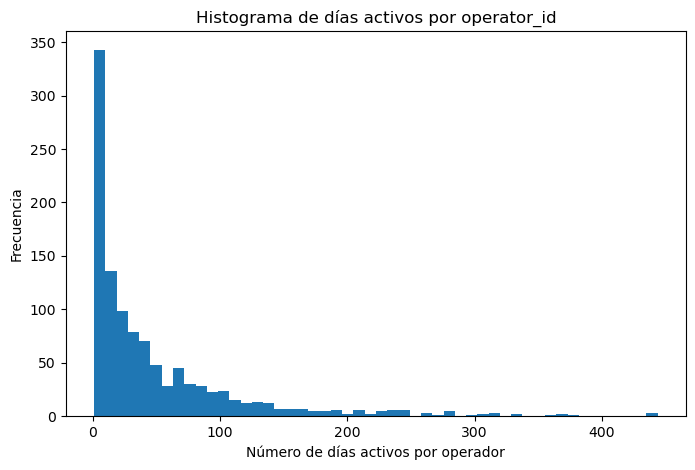

In [40]:
#Cantidad de dias que se opera por operator_id
active_days = telecom_data.groupby('operator_id')['date'].count().sort_values(ascending=False)
print(active_days)
plt.figure(figsize=(8,5))
plt.hist(active_days, bins=50)
plt.xlabel('Número de días activos por operador')
plt.ylabel('Frecuencia')
plt.title('Histograma de días activos por operator_id')
plt.show()

El primer histograma de analisis nos muestra, que la mayoria de los operadores han operado solo un dia durante su estaida, es importante analizar si esto se debe a peculiaridades de la campaña por usuario o si es ineficencia y desacato de cada operador, esto se va a analizar con la primera y ultima vez que existio actividad por parte de cada usuario.

In [41]:
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53793 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              53793 non-null  int64 
 1   date                 53793 non-null  object
 2   direction            53793 non-null  object
 3   internal             53676 non-null  object
 4   operator_id          53793 non-null  Int64 
 5   is_missed_call       53793 non-null  bool  
 6   calls_count          53793 non-null  int64 
 7   call_duration        53793 non-null  int64 
 8   total_call_duration  53793 non-null  int64 
dtypes: Int64(1), bool(1), int64(4), object(3)
memory usage: 3.8+ MB


#### 2.2.2 CANTIDAD DE LLAMADAS INTERNAS POR OPERADOR

internal
False    47513
True      6163
Name: operator_id, dtype: Int64


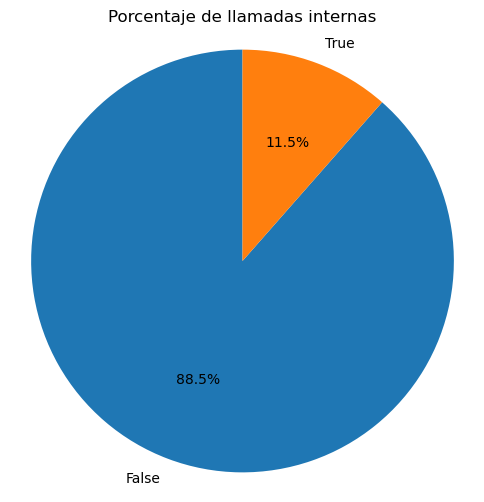

In [42]:
#Groupby operator_id internal y validar si es enrtrada o salida de llamada (grafico)
internal = telecom_data.groupby(['internal'])['operator_id'].count()
print(internal)

plt.figure(figsize=(6,6))
plt.pie(internal,labels=internal.index,autopct='%1.1f%%',startangle=90)
plt.title('Porcentaje de llamadas internas')
plt.axis('equal')  # Hace el círculo perfecto
plt.show()

     operator_id internal_call
256       905564            90
33        887276            82
254       905538            82
279       906406            82
42        888532            82
257       905566            81
298       907952            81
259       905574            80
291       907182            80
131       896008            80


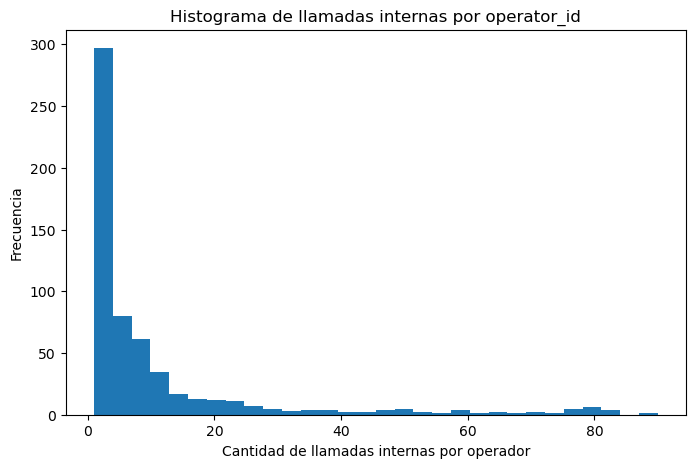

In [43]:
#Llamadas internad por operador
intrn_opp =telecom_data.groupby('operator_id')['internal'].sum().reset_index(name='internal_call')
#Eliminamos aquellos que solo hacen llamadas externas
intrn_opp = intrn_opp[intrn_opp['internal_call']!=0]
print(intrn_opp.sort_values(by='internal_call', ascending=False).head(10))
#Grafica
plt.figure(figsize=(8,5))
plt.hist(intrn_opp['internal_call'], bins=30)
plt.xlabel('Cantidad de llamadas internas por operador')
plt.ylabel('Frecuencia')
plt.title('Histograma de llamadas internas por operator_id')
plt.show()


     operator_id internal_call
256       905564            90
33        887276            82
254       905538            82
279       906406            82
42        888532            82
257       905566            81
298       907952            81
259       905574            80
291       907182            80
131       896008            80


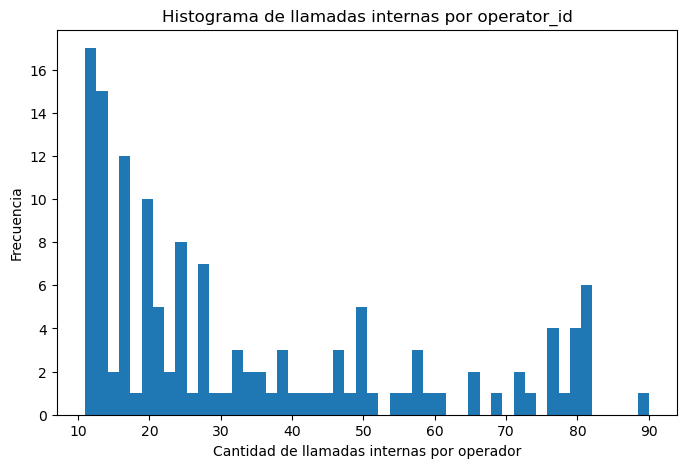

In [44]:
#Eliminamos aquellos que solo hacen llamadas externas
intrn_opp_10 = intrn_opp[~intrn_opp['internal_call'].between(0,10)]
print(intrn_opp.sort_values(by='internal_call', ascending=False).head(10))
#Grafica
plt.figure(figsize=(8,5))
plt.hist(intrn_opp_10['internal_call'], bins=50)
plt.xlabel('Cantidad de llamadas internas por operador')
plt.ylabel('Frecuencia')
plt.title('Histograma de llamadas internas por operator_id')
plt.show()

Lo que nos deja ver este analisis a las llamadas internas que realiza cada operador, son varios puntos, primero que todos los operadores realizaron al menos una llamada interna, pero que existen varios que realizaron mas de 10, pero que aun asi este porcentaje de operadores no lo hicieron de manera tan periodica como para que impacte una metrica, independientenemente de si la llamada fue recibida, o marcada, en este caso se puede observar como la mayoria de las llmadas (88%) dentro del DF analizado son externas, y no tiene relacion con los usuarios o sus operaodres.

Por lo tanto he decidio no tener en cuenta esta metrica para el analisis final, dado que tiene Nan, y su impacto no es tan significativo para una prueba de hipotesis.

#### 2.2.3 AGRUPACION OPERADOR A RAZON DE LLAMADAS PERDIDAS

is_missed_call
False    30334
True     23459
Name: operator_id, dtype: Int64


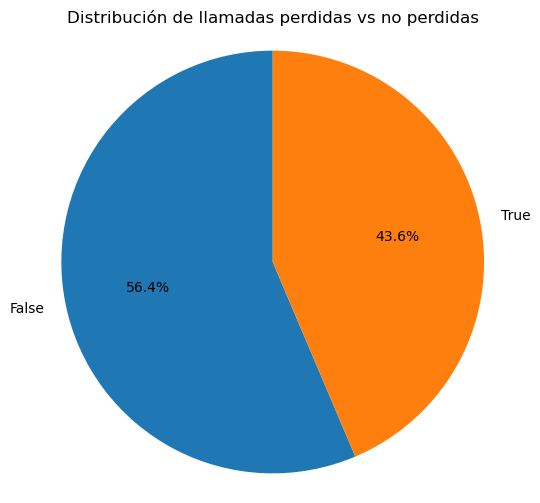

In [45]:
#Cantidad de llamadas perdidas vs tomadas
missed_calls_opp = telecom_data.groupby(['is_missed_call'])['operator_id'].count()
print(missed_calls_opp)

plt.figure(figsize=(6,6))
plt.pie(
    missed_calls_opp,
    labels=missed_calls_opp.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Distribución de llamadas perdidas vs no perdidas')
plt.axis('equal')  # Hace el círculo perfecto
plt.show()


     operator_id  missed_call
28        885876          253
108       893804          228
204       901884          211
12        882686          210
78        891410          206
57        890404          201
33        887276          190
279       906406          172
161       899082          164
1         879898          161


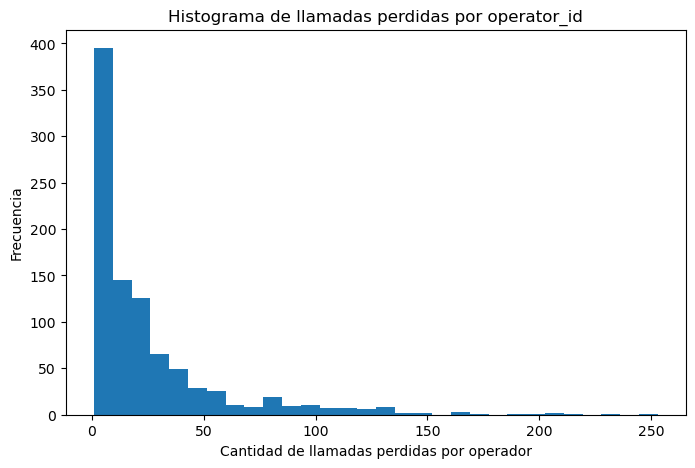

In [46]:
#Llamadas perdidas por operador
opp_missed =telecom_data.groupby('operator_id')['is_missed_call'].sum().reset_index(name='missed_call')
print(opp_missed.sort_values(by='missed_call', ascending=False).head(10))
#Eliminar False 
opp_missed = opp_missed[opp_missed['missed_call']!= 0]
#Grafica
plt.figure(figsize=(8,5))
plt.hist(opp_missed['missed_call'], bins=30)
plt.xlabel('Cantidad de llamadas perdidas por operador')
plt.ylabel('Frecuencia')
plt.title('Histograma de llamadas perdidas por operator_id')
plt.show()


     operator_id  missed_call
28        885876          253
108       893804          228
204       901884          211
12        882686          210
78        891410          206
57        890404          201
33        887276          190
279       906406          172
161       899082          164
1         879898          161
254       905538          161
505       921818          150
497       921318          149
396       915556          140
48        889410          137
51        889754          135
191       900892          135
135       896016          133
106       893674          133
544       924960          133
224       903254          132
5         880028          132
203       901880          128
518       923526          126
79        891414          126
368       913938          125
701       937780          121
227       903318          120
321       908960          119
576       928888          118


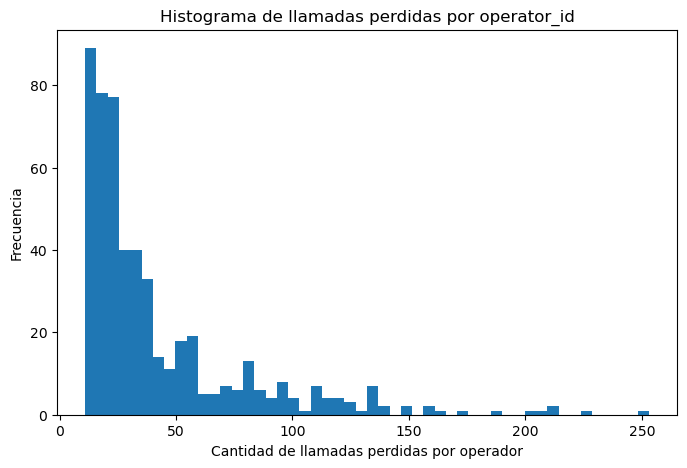

In [47]:
#Eliminamos FALSE a digito singular
opp_missed_10 = opp_missed[~opp_missed['missed_call'].between(0,10)]
print(opp_missed_10.sort_values(by='missed_call', ascending=False).head(30))
#Grafica
plt.figure(figsize=(8,5))
plt.hist(opp_missed_10['missed_call'], bins=50)
plt.xlabel('Cantidad de llamadas perdidas por operador')
plt.ylabel('Frecuencia')
plt.title('Histograma de llamadas perdidas por operator_id')
plt.show()

Este analisis enfocado a un tema individual, es bastante similar al de las llamada internas, ya que por lo menos todos los operadores han tenido llamadas perdidas, en rangos mas altos pero significativamente menoes a un impacto real, auunado a esto, el analisis , arroja que el 45% de los datos crresponden a llamadas perdidas, considero que esta es una cantidad bastante significativa, y dada la importancia de si un operador toma o no la llamada, el analisis general debe enfocarse en las llamadas perdidas, ya que todos lo operadores han tenido llamadas perdidas, por lo que estadisitcamente no se impactaria tanto el analisis.

#### 2.2.4 ANALISIS POR TEMPORALIDAD

In [48]:
#Analisis de temporalidad por parte de operador dentro de usuario.
telecom_data['min_dt'] = telecom_data['date'].min()
telecom_data['max_dt'] = telecom_data['date'].max()
print(telecom_data)

       user_id        date direction internal  operator_id  is_missed_call  \
0       166377  2019-08-04        in    False       880028            True   
1       166377  2019-08-05       out     True       880022            True   
2       166377  2019-08-05       out     True       880020            True   
3       166377  2019-08-05       out     True       880020           False   
4       166377  2019-08-05       out    False       880022            True   
...        ...         ...       ...      ...          ...             ...   
53897   168606  2019-11-10       out     True       957922            True   
53898   168606  2019-11-11       out     True       957922           False   
53899   168606  2019-11-15       out     True       957922           False   
53900   168606  2019-11-15       out     True       957922           False   
53901   168606  2019-11-19        in    False       957922            True   

       calls_count  call_duration  total_call_duration      min

In [ ]:
#Creamos un DF que pueda medir el tiempo entre la primer llamada de un operador y su ultima
user_operator_span = (telecom_data.groupby(['user_id', 'operator_id', 'is_missed_call']).agg(first_call=('date', 'min'),last_call=('date', 'max'),total_calls=('calls_count', 'sum'), call_duration=('call_duration','sum'),total_call_duration=('total_call_duration','sum')).reset_index())
user_operator_span['first_call'] =pd.to_datetime(user_operator_span['first_call'])
user_operator_span['last_call']=pd.to_datetime(user_operator_span['last_call'])


In [50]:
user_operator_span.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1993 entries, 0 to 1992
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              1993 non-null   int64         
 1   operator_id          1993 non-null   Int64         
 2   is_missed_call       1993 non-null   bool          
 3   first_call           1993 non-null   datetime64[ns]
 4   last_call            1993 non-null   datetime64[ns]
 5   total_calls          1993 non-null   int64         
 6   call_duration        1993 non-null   int64         
 7   total_call_duration  1993 non-null   int64         
dtypes: Int64(1), bool(1), datetime64[ns](2), int64(4)
memory usage: 113.0 KB


In [ ]:
#La metrica de dias actvos es la diferencia entre la ultima y la primera llamda de cada operador por usuario
user_operator_span['active_days'] = (user_operator_span['last_call'] - user_operator_span['first_call']).dt.days + 1
#La metrica del call_avg es el promedio de llamadas por operador 
user_operator_span['call_avg'] = (user_operator_span['total_calls'] / user_operator_span['active_days'])
#Los minutos por llamada perdida es la diferencia entre el total de llamada por la duracion de llamada eficiente
user_operator_span['mss_cll_minutes'] = user_operator_span['total_call_duration'] - user_operator_span['call_duration']
#El promedio de minutos por llamda hace razon a la division de duracion de llamda entre el total de llamadas
user_operator_span['avg_min_per_call'] = user_operator_span['call_duration'] /user_operator_span['total_calls']
#El promedio de minutos perdidos es lla division entre llamada pedida sobre total de llamadas
user_operator_span['avg_min_per_misscall'] = user_operator_span['mss_cll_minutes'] / user_operator_span['total_calls']
#El ratio de eficiencia es la division de duracion de cada llamada sobre la duracion total de esta
user_operator_span['efficiency_ratio'] = (user_operator_span['call_duration'] /user_operator_span['total_call_duration'])

user_operator_span.head(20).sort_values(by='user_id', ascending=False)

,user_id,operator_id,is_missed_call,first_call,last_call,total_calls,call_duration,total_call_duration,active_days,call_avg,mss_cll_minutes,avg_min_per_call,avg_min_per_misscall,efficiency_ratio
19,166405,882684,False,2019-08-06,2019-10-29,1142,234659,251435,85,13.435294,16776,205.480736,14.690018,0.933279
17,166399,886674,False,2019-08-12,2019-10-23,16,263,548,73,0.219178,285,16.437500,17.812500,0.479927
18,166399,886674,True,2019-08-12,2019-10-22,12,0,302,72,0.166667,302,0.000000,25.166667,0.000000
13,166392,886892,False,2019-08-20,2019-08-20,2,72,130,1,2.000000,58,36.000000,29.000000,0.553846
15,166392,891906,False,2019-09-05,2019-11-28,77,14957,17000,85,0.905882,2043,194.246753,26.532468,0.879824
16,166392,891906,True,2019-08-02,2019-11-27,128,0,708,118,1.084746,708,0.000000,5.531250,0.000000
14,166392,891900,False,2019-08-29,2019-11-27,36,4415,5753,91,0.395604,1338,122.638889,37.166667,0.767426
10,166391,882476,False,2019-08-06,2019-11-22,3,192,287,109,0.027523,95,64.000000,31.666667,0.668990
11,166391,882478,False,2019-08-07,2019-08-07,3,68,144,1,3.000000,76,22.666667,25.333333,0.472222
12,166391,882478,True,2019-08-06,2019-11-13,21,0,498,100,0.210000,498,0.000000,23.714286,0.000000


In [52]:
user_operator_span.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1993 entries, 0 to 1992
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   user_id               1993 non-null   int64         
 1   operator_id           1993 non-null   Int64         
 2   is_missed_call        1993 non-null   bool          
 3   first_call            1993 non-null   datetime64[ns]
 4   last_call             1993 non-null   datetime64[ns]
 5   total_calls           1993 non-null   int64         
 6   call_duration         1993 non-null   int64         
 7   total_call_duration   1993 non-null   int64         
 8   active_days           1993 non-null   int64         
 9   call_avg              1993 non-null   float64       
 10  mss_cll_minutes       1993 non-null   int64         
 11  avg_min_per_call      1993 non-null   float64       
 12  avg_min_per_misscall  1993 non-null   float64       
 13  efficiency_ratio  

In [ ]:
#Revisamos NAN dentro de usr_operator_span
isna = user_operator_span[user_operator_span['efficiency_ratio'].isna()]
isna

,user_id,operator_id,is_missed_call,first_call,last_call,total_calls,call_duration,total_call_duration,active_days,call_avg,mss_cll_minutes,avg_min_per_call,avg_min_per_misscall,efficiency_ratio
173,166609,895370,True,2019-08-26,2019-08-26,3,0,0,1,3.000000,0,0.0,0.0,NaN
465,166939,955068,True,2019-11-20,2019-11-20,2,0,0,1,2.000000,0,0.0,0.0,NaN
470,166939,955090,True,2019-11-20,2019-11-28,4,0,0,9,0.444444,0,0.0,0.0,NaN
499,166971,914626,True,2019-11-22,2019-11-22,1,0,0,1,1.000000,0,0.0,0.0,NaN
615,167060,930910,True,2019-11-14,2019-11-14,1,0,0,1,1.000000,0,0.0,0.0,NaN
1106,167580,960674,True,2019-11-25,2019-11-25,2,0,0,1,2.000000,0,0.0,0.0,NaN
1238,167654,918988,True,2019-10-01,2019-10-01,1,0,0,1,1.000000,0,0.0,0.0,NaN
1265,167747,922486,True,2019-11-08,2019-11-24,6,0,0,17,0.352941,0,0.0,0.0,NaN
1412,167994,934000,True,2019-10-11,2019-10-11,1,0,0,1,1.000000,0,0.0,0.0,NaN
1439,168010,932672,True,2019-10-11,2019-10-11,2,0,0,1,2.000000,0,0.0,0.0,NaN


In [ ]:
#Sustituimos nan por 0
user_operator_span['efficiency_ratio'] = user_operator_span['efficiency_ratio'].fillna(0)
user_operator_span.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1993 entries, 0 to 1992
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   user_id               1993 non-null   int64         
 1   operator_id           1993 non-null   Int64         
 2   is_missed_call        1993 non-null   bool          
 3   first_call            1993 non-null   datetime64[ns]
 4   last_call             1993 non-null   datetime64[ns]
 5   total_calls           1993 non-null   int64         
 6   call_duration         1993 non-null   int64         
 7   total_call_duration   1993 non-null   int64         
 8   active_days           1993 non-null   int64         
 9   call_avg              1993 non-null   float64       
 10  mss_cll_minutes       1993 non-null   int64         
 11  avg_min_per_call      1993 non-null   float64       
 12  avg_min_per_misscall  1993 non-null   float64       
 13  efficiency_ratio  

In [ ]:
#Obtenemos el conteo de llamadas perdidas
missed_calls = (telecom_data.groupby(['user_id', 'operator_id'])['is_missed_call'].sum().reset_index(name='missed_calls'))
#Se agrega a user_operator_span
user_operator_span = user_operator_span.merge(missed_calls,on=['user_id', 'operator_id'],how='left')

Este acomodo de los datos, es para saber a ciencia cierta la cantidad de llamadas que toma cada operador diariamiente, este de cierta manera es considerado como un buen indicador, que si bien no nos indica si el operador es eficiente o no, nos da una idea de la porductividad de este, esto sin quitar el hecho que existen llamadas internas y llamadas perdidas, se realizara un analisis dividido para las llamadas perdidas y las llamadas tomadas.

In [ ]:
#Se dividen los datos por aquellos donde unicamente hay llamadas perdidas
user_operator_span_missed = user_operator_span[user_operator_span['is_missed_call']== True]
#Se dividen los datos por aquellos donde no hay llamadas perdidas
user_operator_span_nmissed = user_operator_span[user_operator_span['is_missed_call']==False]

print(user_operator_span_missed.shape)
print(user_operator_span_nmissed.shape)

(935, 15)
(1058, 15)


##### 2.2.2.1 ANALISS POR LLAMADAS PERDIDAS

In [57]:
user_operator_span_missed.head(20).sort_values(by='avg_min_per_misscall', ascending=False)

,user_id,operator_id,is_missed_call,first_call,last_call,total_calls,call_duration,total_call_duration,active_days,call_avg,mss_cll_minutes,avg_min_per_call,avg_min_per_misscall,efficiency_ratio,missed_calls
3,166377,880022,True,2019-08-05,2019-11-22,118,0,3685,110,1.072727,3685,0.000000,31.228814,0.000000,33
7,166377,880028,True,2019-08-04,2019-11-28,1214,0,33345,117,10.376068,33345,0.000000,27.467051,0.000000,132
26,166405,882690,True,2019-10-08,2019-11-28,572,0,15436,52,11.000000,15436,0.000000,26.986014,0.000000,26
28,166405,902510,True,2019-09-05,2019-11-28,695,0,17894,85,8.176471,17894,0.000000,25.746763,0.000000,50
18,166399,886674,True,2019-08-12,2019-10-22,12,0,302,72,0.166667,302,0.000000,25.166667,0.000000,10
36,166405,939476,True,2019-10-31,2019-11-27,357,0,8907,28,12.750000,8907,0.000000,24.949580,0.000000,18
30,166405,902532,True,2019-09-05,2019-11-28,289,0,7207,85,3.400000,7207,0.000000,24.937716,0.000000,39
12,166391,882478,True,2019-08-06,2019-11-13,21,0,498,100,0.210000,498,0.000000,23.714286,0.000000,15
40,166406,879896,True,2019-08-02,2019-11-25,255,0,5754,116,2.198276,5754,0.000000,22.564706,0.000000,50
42,166406,879898,True,2019-08-02,2019-11-28,2707,0,58622,119,22.747899,58622,0.000000,21.655707,0.000000,161


Text(0.5, 1.0, 'Duración vs Volumen de llamadas  perdidas por operador-usuario')

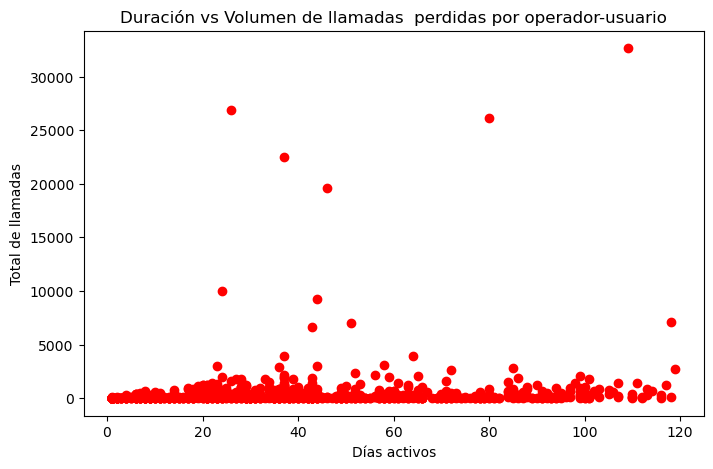

In [58]:
#Grafico de relaciont temporal dias activo vs llamadas para llamadas perdidas
plt.figure(figsize=(8,5))
plt.scatter(user_operator_span_missed['active_days'],user_operator_span_missed['total_calls'], color='red')
plt.xlabel('Días activos')
plt.ylabel('Total de llamadas')
plt.title('Duración vs Volumen de llamadas  perdidas por operador-usuario')

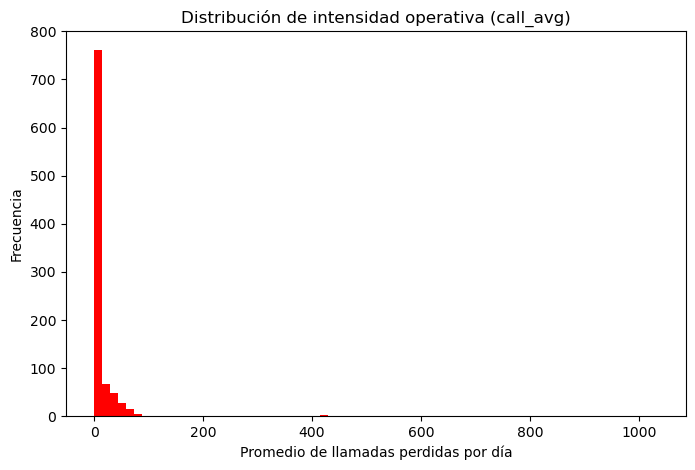

In [59]:
#Historgrama de promedio de llamadas perdidas por dia
plt.figure(figsize=(8,5))
plt.hist(user_operator_span_missed['call_avg'], bins=70, color='red')
plt.xlabel('Promedio de llamadas perdidas por día')
plt.ylabel('Frecuencia')
plt.title('Distribución de intensidad operativa (call_avg)')
plt.show()

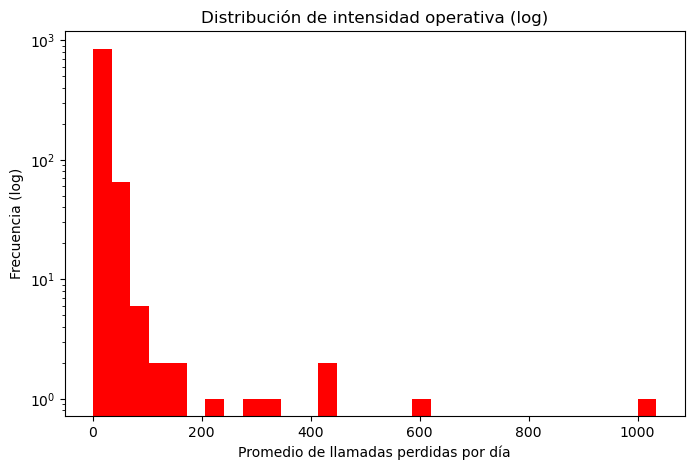

In [60]:
#Distribucion de intesidad de llamadas perdidas
plt.figure(figsize=(8,5))
plt.hist(user_operator_span_missed['call_avg'], bins=30, color='red')
plt.yscale('log')
plt.xlabel('Promedio de llamadas perdidas por día')
plt.ylabel('Frecuencia (log)')
plt.title('Distribución de intensidad operativa (log)')
plt.show()

Tomando como base el primer analisis a llamdas perdias, estas visualizaciones son bastante similares inclusive cuando cambiamos el enfoque asandonos mas en la intensidad de cada operador a razon de su flujo de llamadas y se obtiene la relacion de volumen de llamadas por minutos de las mismas

In [128]:
#Obtenermos la metrica de ineficiencia por dia, dividiendo minutos perdidos al dia
user_operator_span_missed['inefficiency_per_day'] = (user_operator_span_missed['mss_cll_minutes'] /user_operator_span_missed['active_days'])
user_operator_span_missed.head(10).sort_values(by='inefficiency_per_day', ascending=False)

/var/folders/1_/sjj8gmsd2ldg9lptlf744d6h0000gn/T/ipykernel_18065/3164718197.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_operator_span_missed['inefficiency_per_day'] = (user_operator_span_missed['mss_cll_minutes'] /user_operator_span_missed['active_days'])


,user_id,operator_id,is_missed_call,first_call,last_call,total_calls,call_duration,total_call_duration,active_days,call_avg,mss_cll_minutes,avg_min_per_call,avg_min_per_misscall,efficiency_ratio,missed_calls,inefficiency_per_day,inefficiency_score,relation_type,operator_ineff
22,166405,882686,True,2019-08-03,2019-11-28,7080,2,103624,118,60.000000,103622,0.000282,14.635876,0.000019,210,878.152542,0.704905,Intervencion inmediata,Intervencion inmediata
7,166377,880028,True,2019-08-04,2019-11-28,1214,0,33345,117,10.376068,33345,0.000000,27.467051,0.000000,132,285.000000,0.726371,Intervencion inmediata,Intervencion inmediata
5,166377,880026,True,2019-08-07,2019-11-28,696,0,13028,114,6.105263,13028,0.000000,18.718391,0.000000,94,114.280702,0.742222,Intervencion inmediata,Intervencion inmediata
20,166405,882684,True,2019-08-06,2019-10-24,222,0,4347,80,2.775000,4347,0.000000,19.581081,0.000000,55,54.337500,0.779470,Intervencion inmediata,Intervencion inmediata
3,166377,880022,True,2019-08-05,2019-11-22,118,0,3685,110,1.072727,3685,0.000000,31.228814,0.000000,33,33.500000,0.844737,Intervencion inmediata,Intervencion inmediata
16,166392,891906,True,2019-08-02,2019-11-27,128,0,708,118,1.084746,708,0.000000,5.531250,0.000000,54,6.000000,0.843902,Intervencion inmediata,Intervencion inmediata
12,166391,882478,True,2019-08-06,2019-11-13,21,0,498,100,0.210000,498,0.000000,23.714286,0.000000,15,4.980000,0.947934,Intervencion inmediata,Intervencion inmediata
18,166399,886674,True,2019-08-12,2019-10-22,12,0,302,72,0.166667,302,0.000000,25.166667,0.000000,10,4.194444,0.957143,Intervencion inmediata,Intervencion inmediata
1,166377,880020,True,2019-08-05,2019-09-30,30,0,186,57,0.526316,186,0.000000,6.200000,0.000000,7,3.263158,0.896552,Intervencion inmediata,Intervencion inmediata
9,166377,881278,True,2019-08-06,2019-11-25,17,0,67,112,0.151786,67,0.000000,3.941176,0.000000,7,0.598214,0.960465,Intervencion inmediata,Intervencion inmediata


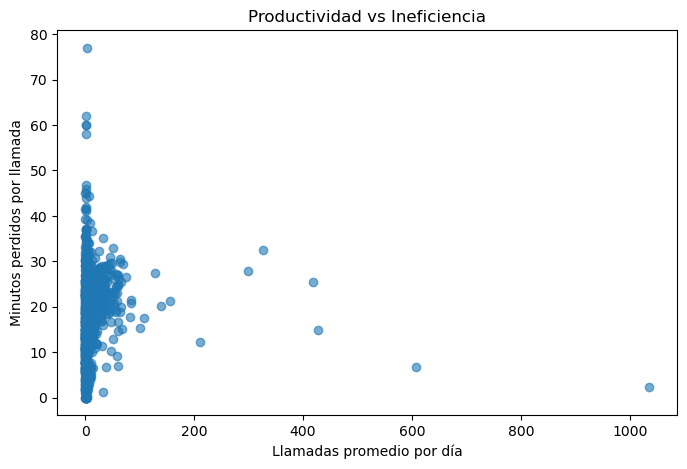

In [129]:
#Graficamos la productividad de operador contra la ineficiciencia
plt.figure(figsize=(8,5))
plt.scatter(
    user_operator_span_missed['call_avg'],
    user_operator_span_missed['avg_min_per_misscall'],
    alpha=0.6
)
plt.xlabel('Llamadas promedio por día')
plt.ylabel('Minutos perdidos por llamada')
plt.title('Productividad vs Ineficiencia')
plt.show()

Este grafico nos deja visualizar la relacion entre la productivdad de los operadores contras su ineficiencia, esto se ve basnte cargado debido a que estamos unicamente contabilizando aquellas llamadas perdias

##### 2.2.2.2 ANALSIS POR LLAMADA TOMADA

Text(0.5, 1.0, 'Duración vs Volumen de llamadas por operador-usuario')

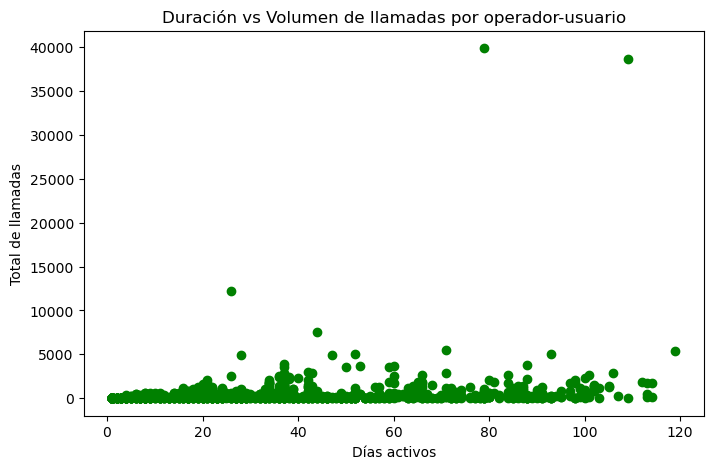

In [63]:
#Grafico de relaciont temporal dias activo vs llamadas para llamadas tomadas
plt.figure(figsize=(8,5))
plt.scatter(user_operator_span_nmissed['active_days'],user_operator_span_nmissed['total_calls'], color='green')
plt.xlabel('Días activos')
plt.ylabel('Total de llamadas')
plt.title('Duración vs Volumen de llamadas por operador-usuario')

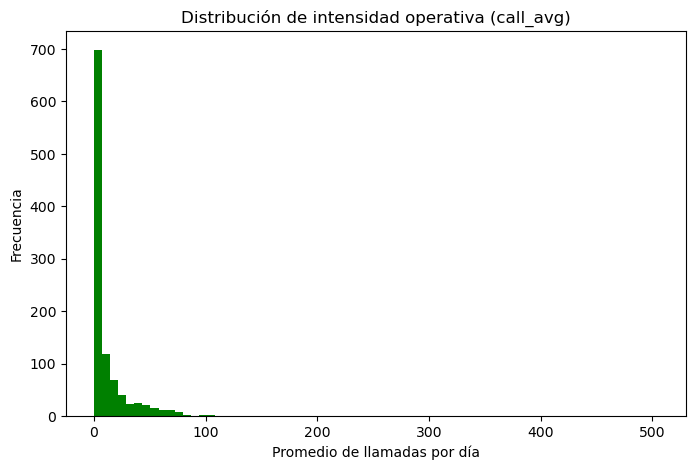

In [64]:
#Historgrama de promedio de llamadas por dia
plt.figure(figsize=(8,5))
plt.hist(user_operator_span_nmissed['call_avg'], bins=70, color='green')
plt.xlabel('Promedio de llamadas por día')
plt.ylabel('Frecuencia')
plt.title('Distribución de intensidad operativa (call_avg)')
plt.show()

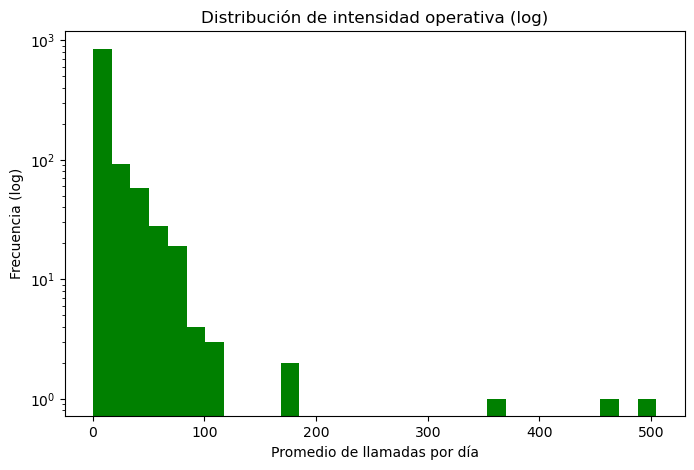

In [65]:
#Distribucion de intesidad de llamadas
plt.figure(figsize=(8,5))
plt.hist(user_operator_span_nmissed['call_avg'], bins=30, color='green')
plt.yscale('log')
plt.xlabel('Promedio de llamadas por día')
plt.ylabel('Frecuencia (log)')
plt.title('Distribución de intensidad operativa (log)')
plt.show()

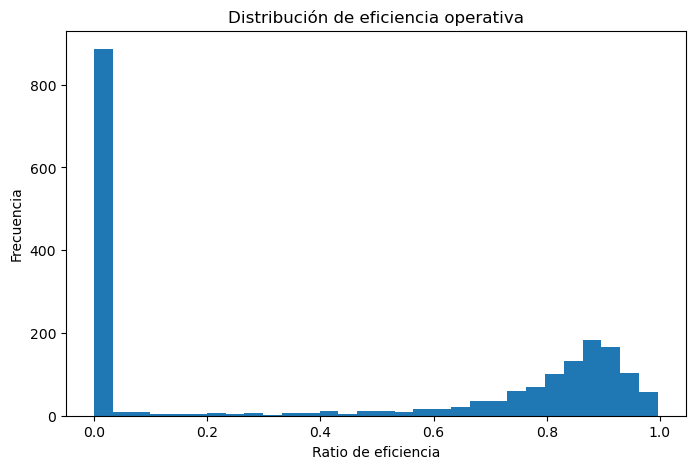

In [66]:
plt.figure(figsize=(8,5))
plt.hist(user_operator_span['efficiency_ratio'], bins=30)
plt.xlabel('Ratio de eficiencia')
plt.ylabel('Frecuencia')
plt.title('Distribución de eficiencia operativa')
plt.show()

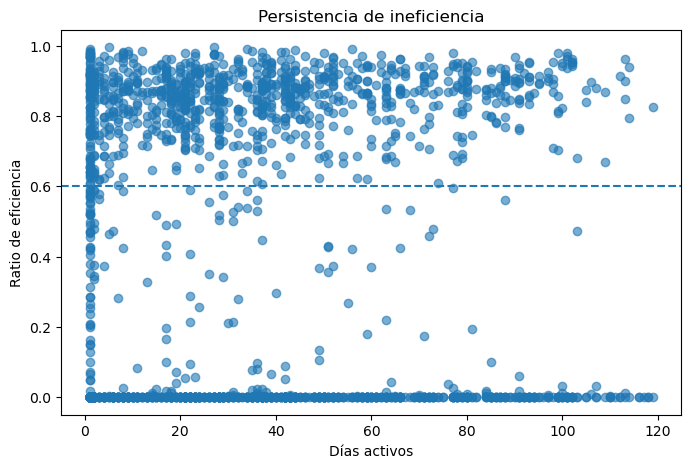

In [67]:
plt.figure(figsize=(8,5))
plt.scatter(
    user_operator_span['active_days'],
    user_operator_span['efficiency_ratio'],
    alpha=0.6
)
plt.axhline(0.6, linestyle='--')
plt.xlabel('Días activos')
plt.ylabel('Ratio de eficiencia')
plt.title('Persistencia de ineficiencia')
plt.show()

En el caso del analisis unicaente con llamadas tomadas, existe una clara diferencia entre un df y otro, y es que existen usuarios que son altamente explotados y que hacen bien su trabajo, teniendo un ratio de llamadas y minutos bastante elevado, esto en su omento pudo haber generado un sesgo en el analisis completo, de igual manera es oimportante reconocer esto para poider validar la toma de decisiones

##### 2.2.1.2 OPERADORES CON ACTIVIDAD MINIMA

In [130]:
#Se obtiene los operadores con un dia activo 
low_active_opps =user_operator_span[user_operator_span['active_days']== 1]
print(low_active_opps['user_id'].duplicated().sum())
print(low_active_opps.tail(20).sort_values(by='total_calls', ascending=False))

140
      user_id  operator_id  is_missed_call first_call  last_call  total_calls  \
1940   168412       952466            True 2019-11-05 2019-11-05          101   
1939   168412       952466           False 2019-11-05 2019-11-05           33   
1873   168336       969380            True 2019-11-22 2019-11-22           14   
1953   168459       968520           False 2019-11-27 2019-11-27           10   
1967   168481       959596            True 2019-11-12 2019-11-12            8   
1876   168361       945074            True 2019-10-23 2019-10-23            3   
1938   168412       952462            True 2019-11-05 2019-11-05            2   
1979   168579       973286           False 2019-11-28 2019-11-28            2   
1872   168336       969380           False 2019-11-28 2019-11-28            1   
1869   168336       969284            True 2019-11-25 2019-11-25            1   
1867   168336       969262            True 2019-11-22 2019-11-22            1   
1866   168336       9672

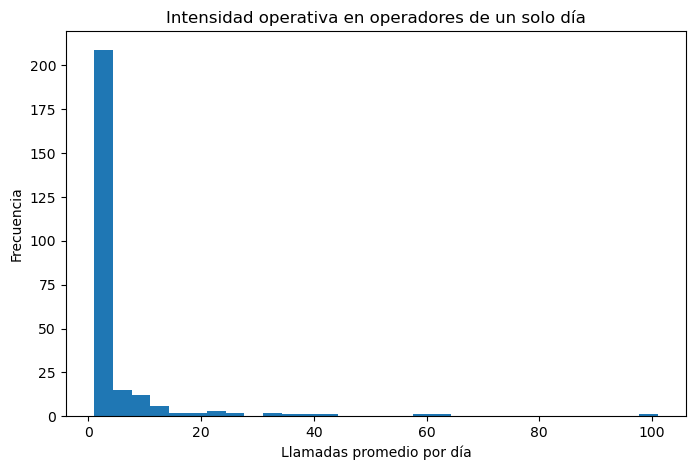

In [69]:
plt.figure(figsize=(8,5))
plt.hist(low_active_opps['call_avg'], bins=30)
plt.xlabel('Llamadas promedio por día')
plt.ylabel('Frecuencia')
plt.title('Intensidad operativa en operadores de un solo día')
plt.show()

Existen 140 operadores de 1092 que solo laboraron un dia, esto tiene que se analizado a posterior para poder entender si no es el usuario quien pudiera estar generando alta rotacion de operadores

#### 2.2.5 AGRUPACION DE USUARIO Y OPERADOR  A RAZON DE LLAMADAS Y DURACION DE LLAMADAS

##### 2.2.5.1 ANALISIS DE USUARIOS

In [70]:
# Total de llamadas por usuario y día
user_day_total = (telecom_data.groupby(['user_id', 'date'])['calls_count'].transform('sum'))
# Porcentaje
telecom_data['pct_calls_user_day'] = (telecom_data['calls_count'] / user_day_total)
user_day_total


0         2
1        32
2        32
3        32
4        32
         ..
53897     2
53898     2
53899     8
53900     8
53901     2
Name: calls_count, Length: 53793, dtype: int64

In [71]:
dominant_users = (telecom_data.groupby(['date', 'user_id'])['calls_count'].sum().reset_index())
# Total de llamadas por día
dominant_users['day_total'] = (dominant_users.groupby('date')['calls_count'].transform('sum'))

dominant_users['pct_day_calls'] = (dominant_users['calls_count'] / dominant_users['day_total'])

# Usuarios que concentran más del 30% del tráfico diario
dominant_users = dominant_users[dominant_users['pct_day_calls'] > 0.30]
non_dominant_users = dominant_users[dominant_users['pct_day_calls']<0.30]
print(dominant_users.sort_values('pct_day_calls', ascending=False).head(10))
print()
print(non_dominant_users.sort_values('pct_day_calls', ascending=False).head(10))

            date  user_id  calls_count  day_total  pct_day_calls
3     2019-08-03   166406           29         30       0.966667
1     2019-08-02   166406           20         21       0.952381
17    2019-08-07   166406          179        198       0.904040
142   2019-08-18   166582          385        442       0.871041
913   2019-09-08   166582         1203       1426       0.843619
133   2019-08-17   166582          987       1178       0.837861
7     2019-08-05   166406          166        200       0.830000
120   2019-08-16   166582         1203       1470       0.818367
13    2019-08-06   166406          202        264       0.765152
1342  2019-09-15   166582         1010       1364       0.740469

Empty DataFrame
Columns: [date, user_id, calls_count, day_total, pct_day_calls]
Index: []


In [ ]:
#Obtenemos el total de llamadas por usuario
user_total_calls = (telecom_data.groupby('user_id')['calls_count'].sum())
#Obtenemos usuarios csin flujo 
users_no_flow = user_total_calls[user_total_calls == 0]
#Obtenemos usuarios con poco flujo de llamadas
low_flow_threshold = user_total_calls.quantile(0.05)

low_flow_users = user_total_calls[user_total_calls <= low_flow_threshold]


print('Usuarios sin flujo:', users_no_flow.shape[0])
users_no_flow.head()
print('Usuarios con flujo muy bajo:', low_flow_users.shape[0])
low_flow_users.sort_values().head()

Usuarios sin flujo: 0
Usuarios con flujo muy bajo: 15


user_id
167139    2
167682    2
168202    3
166507    4
167113    4
Name: calls_count, dtype: int64

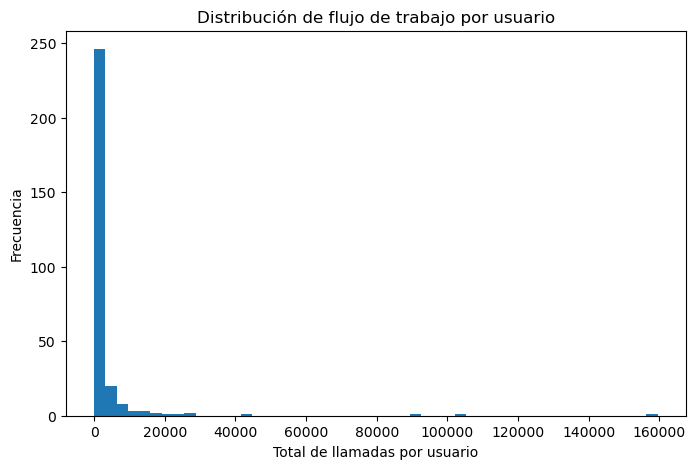

In [73]:
#Grafica
plt.figure(figsize=(8,5))
plt.hist(user_total_calls, bins=50)
plt.xlabel('Total de llamadas por usuario')
plt.ylabel('Frecuencia')
plt.title('Distribución de flujo de trabajo por usuario')
plt.show()

##### 2.2.5.2 ANALISIS POR OPERADOR Y DIA 

In [74]:
# Total de llamadas por operador y día
operator_day_total = (telecom_data.groupby(['operator_id', 'date'])['calls_count'].transform('sum'))
# Porcentaje
telecom_data['pct_calls_operator_day'] = (telecom_data['calls_count'] / operator_day_total)
operator_day_total

0         2
1         6
2        20
3        20
4         6
         ..
53897     2
53898     2
53899     8
53900     8
53901     2
Name: calls_count, Length: 53793, dtype: int64

In [ ]:
#Obtenemos a los operadores domiante contabilizando el total de llamdas
dominant_operators = (telecom_data.groupby(['date', 'operator_id'])['calls_count'].sum().reset_index())
#Se obtiene el total de dias que se generan por sus llamadas
dominant_operators['day_total'] = (dominant_operators.groupby('date')['calls_count'].transform('sum'))
#Se obtiene el % de llamadas por dia de cada uno
dominant_operators['pct_day_calls'] = (dominant_operators['calls_count'] / dominant_operators['day_total'])
#Se asigna un threshold para poder ndiferenciar el 30% de los eficientes
dominant_operators = dominant_operators[dominant_operators['pct_day_calls'] > 0.30]

dominant_operators.sort_values('pct_day_calls', ascending=False).head(10)

,date,operator_id,calls_count,day_total,pct_day_calls
29,2019-08-07,879898,156,198,0.787879
11,2019-08-05,879898,137,200,0.685000
1536,2019-09-08,885876,929,1426,0.651473
881,2019-09-01,885876,393,612,0.642157
0,2019-08-02,879896,13,21,0.619048
5,2019-08-03,879898,18,30,0.600000
172,2019-08-16,885890,865,1470,0.588435
450,2019-08-25,885890,267,460,0.580435
38,2019-08-08,879898,195,378,0.515873
75,2019-08-11,946468,1,2,0.500000


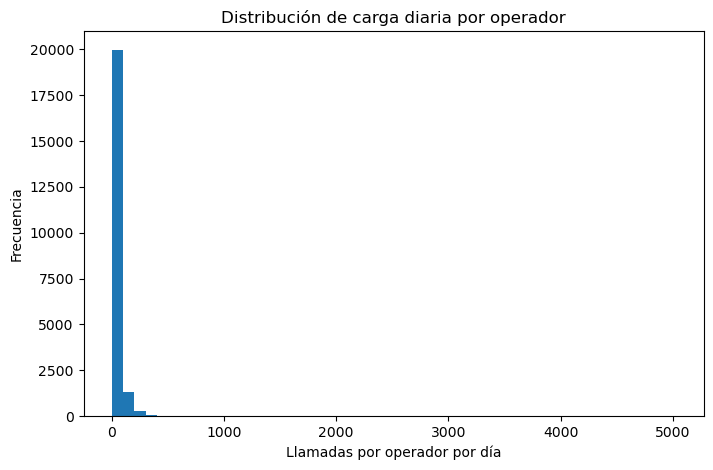

In [ ]:
#Se obtiene la cargad de llamadas diaria por operador grafica
operator_daily_load = (telecom_data.groupby(['operator_id', 'date'])['calls_count'].sum())
plt.figure(figsize=(8,5))
plt.hist(operator_daily_load, bins=50)
plt.xlabel('Llamadas por operador por día')
plt.ylabel('Frecuencia')
plt.title('Distribución de carga diaria por operador')
plt.show()

Esta tendencia ya es muy marcada a lo largo del DF ya que todos los operadores al menos tienen una llamada pero lo preocupante es que la mayoria tienen un llamada, no pudiendo ocupara a toda la cantidad de operadores por cada usuario 

##### 2.2.5.3 OPERADORES SOBRECARGADOS 

In [ ]:
#Obtenemos el quantil de los operadores
threshold = operator_daily_load.quantile(0.95)
#Obtenemos los operadores sobrecargados 
overloaded_ops = operator_daily_load[operator_daily_load > threshold]

overloaded_ops.reset_index().sort_values('calls_count', ascending=False).head(10)

,operator_id,date,calls_count
651,929428,2019-11-11,5022
86,885876,2019-10-01,4128
394,919310,2019-10-11,3481
80,885876,2019-09-23,3033
67,885876,2019-09-10,2978
644,929428,2019-10-31,2730
81,885876,2019-09-24,2637
588,925922,2019-10-08,2438
74,885876,2019-09-17,2335
390,919310,2019-10-07,2307


Estos operadores están en el 5% más cargado:

Mayor probabilidad de llamadas perdidas

Mayor tiempo de espera

Riesgo de burnout / fallos

##### 2.2.5.4 OPERADORES SIN CARGA

In [ ]:
#Obtenemos operadores sincarga laboral
operator_total_calls = (telecom_data.groupby('operator_id')['calls_count'].sum())
#Hacemos la distincion para identifcar los que no tienen llamadas
operators_no_flow = operator_total_calls[operator_total_calls == 0]

print('Operadores sin flujo:', operators_no_flow.shape[0])
operators_no_flow.head()

Operadores sin flujo: 0


Series([], Name: calls_count, dtype: int64)

In [ ]:
#Asignamos un qantile para deliitat a los bajos operadore
low_op_threshold = operator_total_calls.quantile(0.05)
#obtenemos la diferencia y delimintamos operadores con flujo de trabajo bajo
low_flow_ops = operator_total_calls[operator_total_calls <= low_op_threshold]

print('Operadores infrautilizados:', low_flow_ops.shape[0])
low_flow_ops.sort_values().head()

Operadores infrautilizados: 88


operator_id
883898    1
890234    1
891192    1
891948    1
905478    1
Name: calls_count, dtype: int64

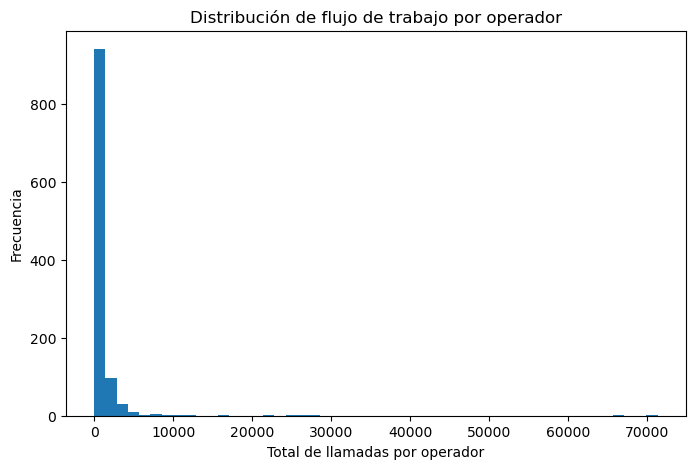

In [81]:
plt.figure(figsize=(8,5))
plt.hist(operator_total_calls, bins=50)
plt.xlabel('Total de llamadas por operador')
plt.ylabel('Frecuencia')
plt.title('Distribución de flujo de trabajo por operador')
plt.show()

In [ ]:
#Generamos una distincion de los operadores y los categorizamos segun su flujo de llamadas
summary_flow = pd.DataFrame({
    'total_calls': operator_total_calls
})

summary_flow['status'] = 'normal'
summary_flow.loc[summary_flow['total_calls'] <= low_op_threshold, 'status'] = 'infrautilizado'
summary_flow.loc[
    summary_flow['total_calls'] >= operator_total_calls.quantile(0.95),
    'status'
] = 'sobrecargado'

summary_flow['status'].value_counts()

status
normal            949
infrautilizado     88
sobrecargado       55
Name: count, dtype: int64

##### 2.2.5.5 RELACION CON LAS LLAMADAS PERDIDAS 

In [ ]:
#Obtenemos llamadas perdidas por operador
missed_by_operator = (telecom_data.groupby('operator_id').agg(total_calls=('calls_count', 'sum'),missed_calls=('is_missed_call', 'sum')))
#oBTENEMOS EL RATE DE LLAMADAS PERDIDAS
missed_by_operator['missed_rate'] = (missed_by_operator['missed_calls'] / missed_by_operator['total_calls'])

missed_by_operator.sort_values('missed_rate', ascending=False).head(10)

,total_calls,missed_calls,missed_rate
operator_id,,,
914272,1,1,1.0
954284,1,1,1.0
932246,1,1,1.0
899076,2,2,1.0
937710,1,1,1.0
937716,1,1,1.0
937770,1,1,1.0
941826,1,1,1.0
937778,1,1,1.0


#### 2.2.6 RELACION USUARIOS V OPERADOR

In [84]:
#Usuarios con mayor rotacion de operadores 
user_repeat_count = (low_active_opps.groupby('user_id').size().reset_index(name='num_operadores').sort_values('num_operadores', ascending=False))

user_repeat_count.head(10)

,user_id,num_operadores
102,168187,16
106,168225,12
15,166680,9
107,168252,9
68,167497,8
94,168073,7
53,167176,6
109,168336,6
24,166837,6
56,167188,5


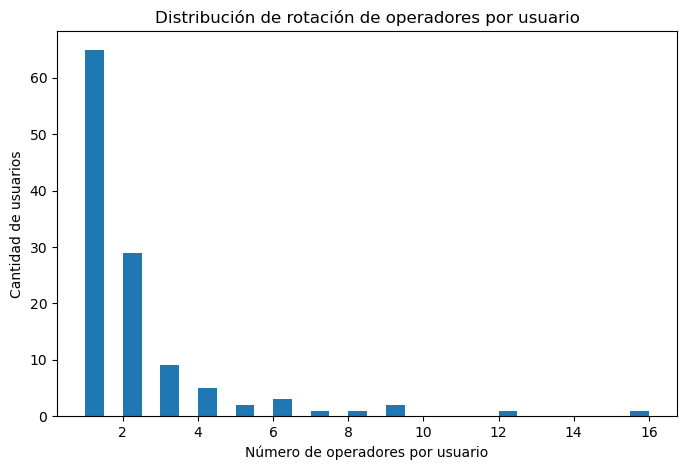

In [85]:
plt.figure(figsize=(8,5))
plt.hist(user_repeat_count['num_operadores'], bins=30)
plt.xlabel('Número de operadores por usuario')
plt.ylabel('Cantidad de usuarios')
plt.title('Distribución de rotación de operadores por usuario')
plt.show()

In [ ]:
#Generamos una categorizacion de el estatus de usuartios dentro del DF total 

user_operator_span['status'] = 'normal'
user_operator_span.loc[user_operator_span['call_avg'] < 1, 'status'] = 'infrautilizado'
user_operator_span.loc[user_operator_span['call_avg'] > user_operator_span['call_avg'].quantile(0.90), 'status'] = 'sobrecargado'

user_operator_span['status'].value_counts()

status
normal            1266
infrautilizado     527
sobrecargado       200
Name: count, dtype: int64

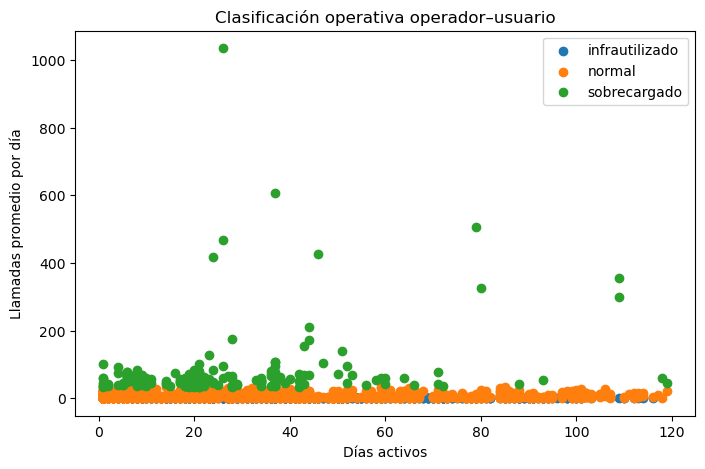

In [87]:
plt.figure(figsize=(8,5))
for status, color in zip(
    ['infrautilizado', 'normal', 'sobrecargado'],
    ['gray', 'blue', 'red']
):
    subset = user_operator_span[user_operator_span['status'] == status]
    plt.scatter(
        subset['active_days'],
        subset['call_avg'],
        label=status
    )

plt.xlabel('Días activos')
plt.ylabel('Llamadas promedio por día')
plt.title('Clasificación operativa operador–usuario')
plt.legend()
plt.show()

Despues de la categorizacion que se realizo para el flujo de trabajo que se le otorga alos usuarios, nos percatemos que hay muchos usuarios que tienen muy pocas llamadas mientras hay algunos que tienen demasidas, y no existe un balance concreto, aqui es correcto mejorar la distribucion de llamadas para no sobresaturar, y para dar trabajo a aquellos que no o tienen

## 3 IDENTIFICACION DE OPERADORES INEFICIENTES

El analisis de las relaciones,definidas  en conjunto con las caracteristicas princiaples nos ayudara a poder  detemrinar los KPI reales 

### 3.3 RELACION DE USUARIOS CON OPERADORES

Es importante definir que un buen desempeño del operador se basa tambien en la relacion con su empleador, por lo que tambien se debe de analizar si existe un patron en cuanto los operadores teniendo malos rendimientos a razon de un solo empleador 

In [88]:
print(user_operator_span.isna().sum())

user_id                 0
operator_id             0
is_missed_call          0
first_call              0
last_call               0
total_calls             0
call_duration           0
total_call_duration     0
active_days             0
call_avg                0
mss_cll_minutes         0
avg_min_per_call        0
avg_min_per_misscall    0
efficiency_ratio        0
missed_calls            0
status                  0
dtype: int64


In [ ]:
#Usuarios y operadorex
usr_opp = user_operator_span.copy()
#Validamos metricas anteriores
usr_opp['efficiency_ratio'] = usr_opp['call_duration'] / usr_opp['total_call_duration']
usr_opp['missed_rate'] = usr_opp['missed_calls'] / usr_opp['total_calls']
usr_opp['call_avg'] = usr_opp['total_calls'] / usr_opp['active_days']
usr_opp['lost_minutes_per_day'] = usr_opp['mss_cll_minutes'] / usr_opp['active_days']


In [ ]:
#Se calcula la eficiencia y ineficiencia por operador
operator_baseline = (usr_opp.groupby('operator_id').agg(op_eff=('efficiency_ratio','mean'),op_miss=('missed_rate','mean')))

operator_baseline

,op_eff,op_miss
operator_id,,
879896,0.454120,0.126578
879898,0.413434,0.044701
880020,0.469647,0.262500
880022,0.481836,0.303197
880026,0.469652,0.094494
...,...,...
972410,0.446137,0.052027
972412,0.440998,0.067778
972460,0.421234,0.089286


In [ ]:
#Se calcula la eficiencia y la ineficiencia por usuario
user_baseline = (usr_opp.groupby('user_id').agg(usr_eff=('efficiency_ratio','mean'),usr_miss=('missed_rate','mean')))

user_baseline

,usr_eff,usr_miss
user_id,,
166377,0.473370,0.424771
166391,0.380404,1.904762
166392,0.550274,0.280793
166399,0.239964,0.729167
166405,0.448879,0.090990
...,...,...
168583,0.502652,0.381818
168598,0.480713,0.383893
168601,0.409598,0.338819


In [ ]:
#Se une al df de usuarios y operadores
usr_opp= (usr_opp.merge(operator_baseline, on='operator_id', how='left').merge(user_baseline, on='user_id', how='left'))


print(usr_opp)


      user_id  operator_id  is_missed_call first_call  last_call  total_calls  \
0      166377       880020           False 2019-08-05 2019-10-03           24   
1      166377       880020            True 2019-08-05 2019-09-30           30   
2      166377       880022           False 2019-08-08 2019-11-28          101   
3      166377       880022            True 2019-08-05 2019-11-22          118   
4      166377       880026           False 2019-08-07 2019-11-28         1743   
...       ...          ...             ...        ...        ...          ...   
1988   168601       952916            True 2019-11-12 2019-11-12            1   
1989   168603       959118           False 2019-11-12 2019-11-27           10   
1990   168603       959118            True 2019-11-20 2019-11-28            8   
1991   168606       957922           False 2019-11-08 2019-11-15           19   
1992   168606       957922            True 2019-11-08 2019-11-19           12   

      call_duration  total_

In [93]:
usr_opp['delta_eff_operator'] = usr_opp['efficiency_ratio'] - usr_opp['op_eff']
usr_opp['delta_eff_user'] = usr_opp['efficiency_ratio'] - usr_opp['usr_eff'] 
usr_opp

,user_id,operator_id,is_missed_call,first_call,last_call,total_calls,call_duration,total_call_duration,active_days,call_avg,...,missed_calls,status,missed_rate,lost_minutes_per_day,op_eff,op_miss,usr_eff,usr_miss,delta_eff_operator,delta_eff_user
0,166377,880020,False,2019-08-05,2019-10-03,24,2290,2438,60,0.400000,...,7,infrautilizado,0.291667,2.466667,0.469647,0.262500,0.473370,0.424771,0.469647,0.465924
1,166377,880020,True,2019-08-05,2019-09-30,30,0,186,57,0.526316,...,7,infrautilizado,0.233333,3.263158,0.469647,0.262500,0.473370,0.424771,-0.469647,-0.473370
2,166377,880022,False,2019-08-08,2019-11-28,101,18304,18994,113,0.893805,...,33,infrautilizado,0.326733,6.106195,0.481836,0.303197,0.473370,0.424771,0.481836,0.490302
3,166377,880022,True,2019-08-05,2019-11-22,118,0,3685,110,1.072727,...,33,normal,0.279661,33.500000,0.481836,0.303197,0.473370,0.424771,-0.481836,-0.473370
4,166377,880026,False,2019-08-07,2019-11-28,1743,169674,180638,114,15.289474,...,94,normal,0.053930,96.175439,0.469652,0.094494,0.473370,0.424771,0.469652,0.465934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1988,168601,952916,True,2019-11-12,2019-11-12,1,0,44,1,1.000000,...,1,normal,1.000000,44.000000,0.382353,0.571429,0.409598,0.338819,-0.382353,-0.409598
1989,168603,959118,False,2019-11-12,2019-11-27,10,905,1088,16,0.625000,...,4,infrautilizado,0.400000,11.437500,0.415901,0.450000,0.415901,0.450000,0.415901,0.415901
1990,168603,959118,True,2019-11-20,2019-11-28,8,0,218,9,0.888889,...,4,infrautilizado,0.500000,24.222222,0.415901,0.450000,0.415901,0.450000,-0.415901,-0.415901
1991,168606,957922,False,2019-11-08,2019-11-15,19,8231,8532,8,2.375000,...,5,normal,0.263158,37.625000,0.482361,0.339912,0.482361,0.339912,0.482361,0.482361


In [ ]:
#Generamos etiquetas para el estatus de cada relacion entre usuario y operador
def classify_relation(row):
    if row['delta_eff_operator'] < -0.15 and row['delta_eff_user'] < -0.15:
        return 'Relación crítica'
    if row['delta_eff_operator'] < -0.15:
        return 'Usuario problemático'
    if row['delta_eff_user'] < -0.15:
        return 'Operador problemático'
    return 'Relación normal'

usr_opp['relation_type'] = usr_opp.apply(classify_relation, axis=1)
usr_opp.sample(20)

,user_id,operator_id,is_missed_call,first_call,last_call,total_calls,call_duration,total_call_duration,active_days,call_avg,...,status,missed_rate,lost_minutes_per_day,op_eff,op_miss,usr_eff,usr_miss,delta_eff_operator,delta_eff_user,relation_type
835,167250,913984,True,2019-11-01,2019-11-01,10,0,46,1,10.000000,...,normal,0.200000,46.000000,0.440083,0.600000,0.399012,0.619082,-0.440083,-0.399012,Relación crítica
1384,167976,934430,False,2019-10-11,2019-11-27,29,4744,5538,48,0.604167,...,infrautilizado,0.586207,16.541667,0.428313,0.647270,0.620300,0.258908,0.428313,0.236327,Relación normal
1607,168097,935264,True,2019-10-16,2019-10-18,18,0,371,3,6.000000,...,normal,0.166667,123.666667,0.464395,0.112179,0.492961,0.532609,-0.464395,-0.492961,Relación crítica
1328,167888,930020,False,2019-10-08,2019-11-28,486,214966,222656,52,9.346154,...,normal,0.094650,147.884615,0.482815,0.159520,0.470154,0.127446,0.482647,0.495308,Relación normal
448,166916,906412,True,2019-10-09,2019-11-28,107,824,2304,51,2.098039,...,normal,0.383178,29.019608,0.628885,0.274585,0.470439,0.346731,-0.271246,-0.112800,Usuario problemático
1124,167626,919194,True,2019-09-24,2019-10-15,698,0,18437,22,31.727273,...,normal,0.031519,838.045455,0.448768,0.028447,0.409723,0.054020,-0.448768,-0.409723,Relación crítica
1820,168252,961064,True,2019-11-19,2019-11-28,372,0,9171,10,37.200000,...,sobrecargado,0.021505,917.100000,0.397553,0.017947,0.485298,0.301237,-0.397553,-0.485298,Relación crítica
839,167250,929544,True,2019-10-16,2019-11-26,23,0,365,42,0.547619,...,infrautilizado,0.347826,8.690476,0.471239,0.257246,0.399012,0.619082,-0.471239,-0.399012,Relación crítica
1623,168121,940458,True,2019-10-18,2019-11-28,51,0,757,42,1.214286,...,normal,0.549020,18.023810,0.453169,0.453997,0.428825,0.305071,-0.453169,-0.428825,Relación crítica
805,167188,923646,False,2019-09-30,2019-09-30,2,28,66,1,2.000000,...,normal,0.000000,38.000000,0.424242,0.000000,0.505106,0.195275,0.000000,-0.080863,Relación normal


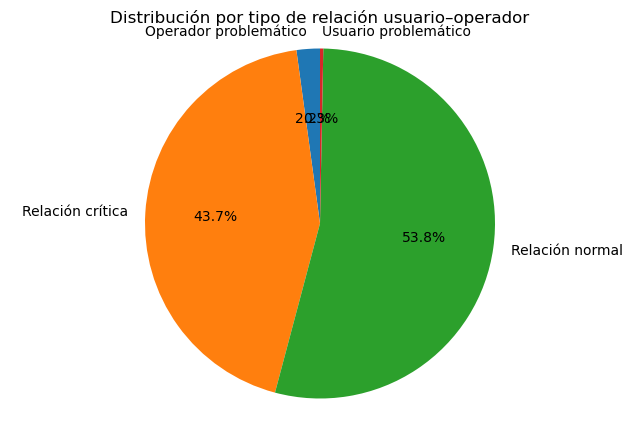

In [95]:
relation_type = (
    usr_opp
    .groupby('relation_type')
    .agg(usr_count=('user_id','count')))

plt.figure(figsize=(8,5))
plt.pie(
    relation_type['usr_count'],     
    labels=relation_type.index,      
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Distribución por tipo de relación usuario–operador')
plt.axis('equal')
plt.show()

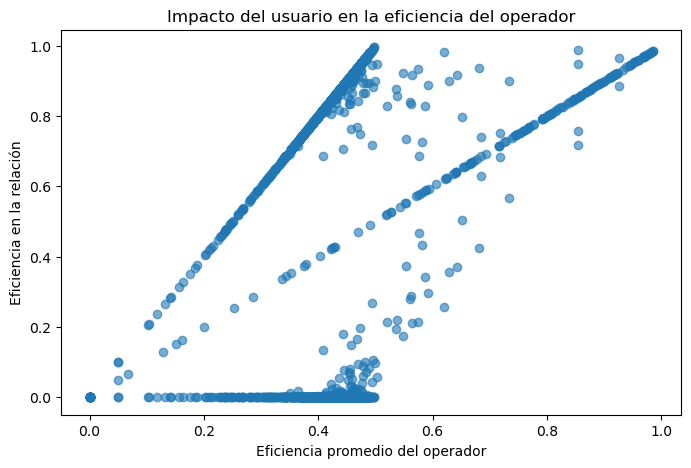

In [96]:
plt.figure(figsize=(8,5))
plt.scatter(usr_opp['op_eff'],usr_opp['efficiency_ratio'],alpha=0.6)
plt.xlabel('Eficiencia promedio del operador')
plt.ylabel('Eficiencia en la relación')
plt.title('Impacto del usuario en la eficiencia del operador')
plt.show()


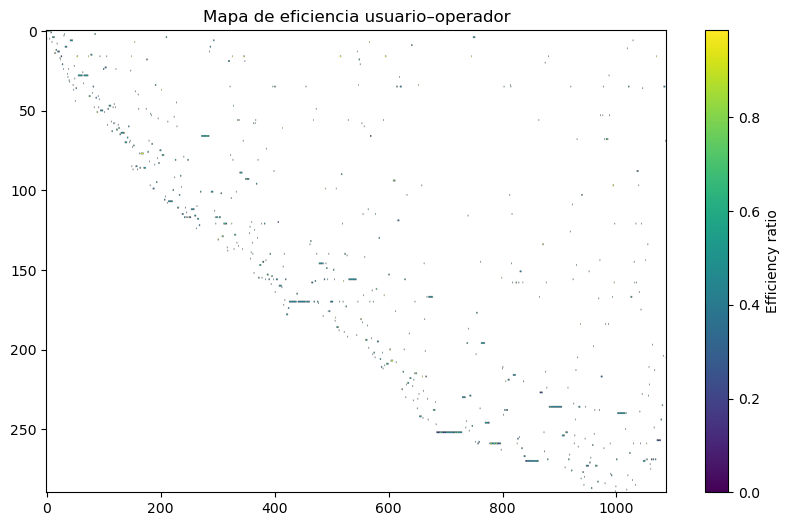

In [97]:
pivot =usr_opp.pivot_table(
    index='user_id',
    columns='operator_id',
    values='efficiency_ratio'
)

plt.figure(figsize=(10,6))
plt.imshow(pivot, aspect='auto')
plt.colorbar(label='Efficiency ratio')
plt.title('Mapa de eficiencia usuario–operador')
plt.show()

Estos analisis nos dejan ver que aquellos operadores que tienen un mal rendiminto es por que en general el usuario que los ocntrata o para el que laboran no sabe crear estretegias concretas que puedan beneficiar a sus operadores, lo que desenvoca en problemas dirrectos u operacionales, que son faciles de solucionar pero que unicamente recae en responsabilidad del operador

### 3.4 DEFINICION DE KPIS O CARACTERISTICA PARA CADA OPERADOR

In [98]:
user_operator_span_missed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 935 entries, 1 to 1992
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   user_id               935 non-null    int64         
 1   operator_id           935 non-null    Int64         
 2   is_missed_call        935 non-null    bool          
 3   first_call            935 non-null    datetime64[ns]
 4   last_call             935 non-null    datetime64[ns]
 5   total_calls           935 non-null    int64         
 6   call_duration         935 non-null    int64         
 7   total_call_duration   935 non-null    int64         
 8   active_days           935 non-null    int64         
 9   call_avg              935 non-null    float64       
 10  mss_cll_minutes       935 non-null    int64         
 11  avg_min_per_call      935 non-null    float64       
 12  avg_min_per_misscall  935 non-null    float64       
 13  efficiency_ratio      93

In [ ]:
#Generamos la metrica principal de ineficicencia tomando como base la efficicencia ratio y el promedio de llamadas
user_operator_span_missed['inefficiency_score'] = ((1 - user_operator_span_missed['efficiency_ratio']) * 0.7 +(1 / (user_operator_span_missed['call_avg'] + 1)) * 0.3)
user_operator_span_missed.sort_values(by='inefficiency_score',ascending=False).head(10)

/var/folders/1_/sjj8gmsd2ldg9lptlf744d6h0000gn/T/ipykernel_18065/106704962.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_operator_span_missed['inefficiency_score'] = ((1 - user_operator_span_missed['efficiency_ratio']) * 0.7 +(1 / (user_operator_span_missed['call_avg'] + 1)) * 0.3)


,user_id,operator_id,is_missed_call,first_call,last_call,total_calls,call_duration,total_call_duration,active_days,call_avg,mss_cll_minutes,avg_min_per_call,avg_min_per_misscall,efficiency_ratio,missed_calls,inefficiency_per_day,inefficiency_score,relation_type
157,166585,889638,True,2019-08-16,2019-11-24,3,0,27,101,0.029703,27,0.0,9.000000,0.0,2,0.267327,0.991346,Intervencion inmediata
833,167246,908082,True,2019-09-30,2019-11-26,3,0,6,58,0.051724,6,0.0,2.000000,0.0,2,0.103448,0.985246,Intervencion inmediata
414,166901,896010,True,2019-08-26,2019-11-27,5,0,15,94,0.053191,15,0.0,3.000000,0.0,4,0.159574,0.984848,Intervencion inmediata
608,167059,911140,True,2019-09-26,2019-11-01,2,0,42,37,0.054054,42,0.0,21.000000,0.0,2,1.135135,0.984615,Intervencion inmediata
601,167059,911102,True,2019-09-23,2019-11-09,3,0,77,48,0.062500,77,0.0,25.666667,0.0,3,1.604167,0.982353,Intervencion inmediata
422,166901,896018,True,2019-09-05,2019-10-29,4,0,88,55,0.072727,88,0.0,22.000000,0.0,3,1.600000,0.979661,Intervencion inmediata
924,167451,914170,True,2019-09-22,2019-11-01,3,0,35,41,0.073171,35,0.0,11.666667,0.0,2,0.853659,0.979545,Intervencion inmediata
222,166671,888520,True,2019-08-14,2019-09-23,3,0,18,41,0.073171,18,0.0,6.000000,0.0,3,0.439024,0.979545,Intervencion inmediata
276,166688,890226,True,2019-08-17,2019-09-25,3,0,42,40,0.075000,42,0.0,14.000000,0.0,2,1.050000,0.979070,Intervencion inmediata
529,166985,904284,True,2019-08-29,2019-11-27,7,0,98,91,0.076923,98,0.0,14.000000,0.0,6,1.076923,0.978571,Intervencion inmediata


In [ ]:
#Generamos etiquetas para cada operadore
def classify_relation(row):
    if row['inefficiency_score'] > 0.50:
        return 'Intervencion inmediata'
    if 0.50 > row['inefficiency_score'] > 0.35:
        return 'Critico'
    if 0.35 > row['inefficiency_score'] > 0.20:
        return 'Revisar'
    return 'Normal'
    
user_operator_span_missed['operator_ineff'] = user_operator_span_missed.apply(classify_relation, axis=1)
user_operator_span_missed.sample(20)

/var/folders/1_/sjj8gmsd2ldg9lptlf744d6h0000gn/T/ipykernel_18065/116397430.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_operator_span_missed['operator_ineff'] = user_operator_span_missed.apply(classify_relation, axis=1)


,user_id,operator_id,is_missed_call,first_call,last_call,total_calls,call_duration,total_call_duration,active_days,call_avg,mss_cll_minutes,avg_min_per_call,avg_min_per_misscall,efficiency_ratio,missed_calls,inefficiency_per_day,inefficiency_score,relation_type,operator_ineff
1434,168004,934098,True,2019-10-11,2019-11-14,13,0,185,35,0.371429,185,0.000000,14.230769,0.000000,10,5.285714,0.918750,Intervencion inmediata,Intervencion inmediata
438,166916,906402,True,2019-09-26,2019-11-26,7,0,55,62,0.112903,55,0.000000,7.857143,0.000000,5,0.887097,0.969565,Intervencion inmediata,Intervencion inmediata
979,167497,917378,True,2019-10-05,2019-10-10,8,0,161,6,1.333333,161,0.000000,20.125000,0.000000,4,26.833333,0.828571,Intervencion inmediata,Intervencion inmediata
779,167180,905934,True,2019-09-24,2019-11-05,6,0,66,43,0.139535,66,0.000000,11.000000,0.000000,5,1.534884,0.963265,Intervencion inmediata,Intervencion inmediata
1685,168187,937812,True,2019-10-18,2019-11-28,89,122,2299,42,2.119048,2177,1.370787,24.460674,0.053067,27,51.833333,0.759037,Intervencion inmediata,Intervencion inmediata
266,166680,960294,True,2019-11-20,2019-11-28,165,0,2595,9,18.333333,2595,0.000000,15.727273,0.000000,7,288.333333,0.715517,Intervencion inmediata,Intervencion inmediata
969,167497,914426,True,2019-10-04,2019-10-04,1,0,28,1,1.000000,28,0.000000,28.000000,0.000000,1,28.000000,0.850000,Intervencion inmediata,Intervencion inmediata
1683,168187,937810,True,2019-10-21,2019-11-28,177,0,5716,39,4.538462,5716,0.000000,32.293785,0.000000,32,146.564103,0.754167,Intervencion inmediata,Intervencion inmediata
1208,167630,920666,True,2019-09-26,2019-11-26,81,0,1727,62,1.306452,1727,0.000000,21.320988,0.000000,35,27.854839,0.830070,Intervencion inmediata,Intervencion inmediata
1743,168193,947820,True,2019-11-14,2019-11-14,1,0,3,1,1.000000,3,0.000000,3.000000,0.000000,1,3.000000,0.850000,Intervencion inmediata,Intervencion inmediata


In [ ]:
#Contabilizamos la cantidad de operadores ineficientes
ineff = user_operator_span_missed.groupby('operator_ineff')['user_id'].count().reset_index(name='count')
ineff

,operator_ineff,count
0,Critico,4
1,Intervencion inmediata,928
2,Normal,2
3,Revisar,1


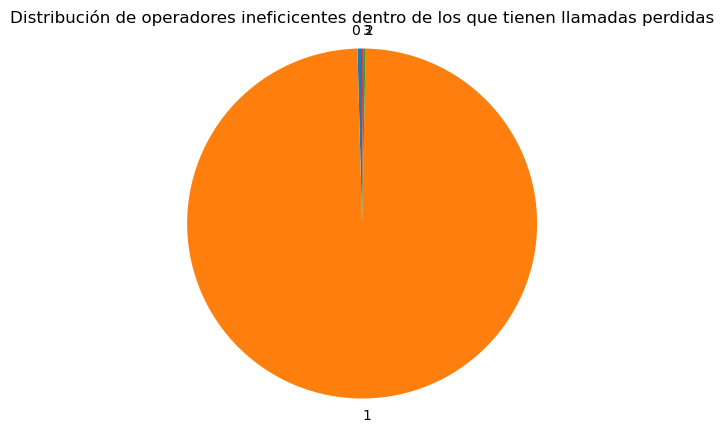

In [116]:
plt.figure(figsize=(8,5))
plt.pie(
    ineff['count'],     
    labels=ineff.index,      
    startangle=90
)
plt.title('Distribución de operadores ineficicentes dentro de los que tienen llamadas perdidas')
plt.axis('equal')
plt.show()

### 3.5 RELACION ESTADISTICA DE CADA KPI O CARACTERISTICA

In [117]:
user_operator_span_missed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 935 entries, 1 to 1992
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   user_id               935 non-null    int64         
 1   operator_id           935 non-null    Int64         
 2   is_missed_call        935 non-null    bool          
 3   first_call            935 non-null    datetime64[ns]
 4   last_call             935 non-null    datetime64[ns]
 5   total_calls           935 non-null    int64         
 6   call_duration         935 non-null    int64         
 7   total_call_duration   935 non-null    int64         
 8   active_days           935 non-null    int64         
 9   call_avg              935 non-null    float64       
 10  mss_cll_minutes       935 non-null    int64         
 11  avg_min_per_call      935 non-null    float64       
 12  avg_min_per_misscall  935 non-null    float64       
 13  efficiency_ratio      93

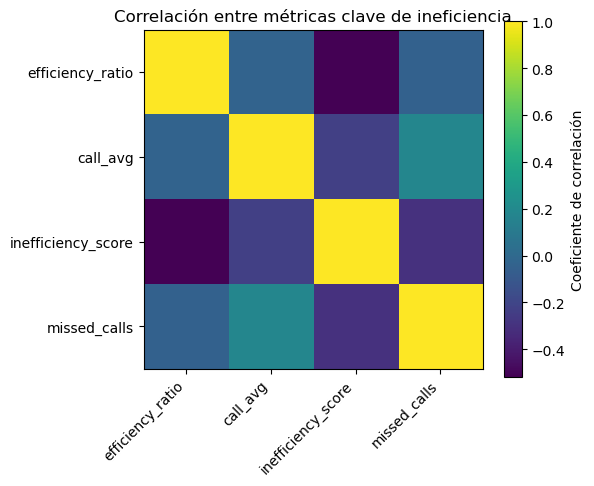

In [ ]:
# Seleccionar métricas clave
metrics = user_operator_span_missed[[
    'efficiency_ratio',
    'call_avg',
    'inefficiency_score',
    'missed_calls'
]]

# Calcular matriz de correlación
corr = metrics.corr()

# Graficar heatmap
plt.figure(figsize=(6,5))
plt.imshow(corr)
plt.colorbar(label='Coeficiente de correlación')

plt.xticks(
    range(len(corr.columns)),
    corr.columns,
    rotation=45,
    ha='right'
)
plt.yticks(
    range(len(corr.index)),
    corr.index
)

plt.title('Correlación entre métricas clave de ineficiencia')
plt.tight_layout()
plt.show()

## 4 PRUEBAS DE HIPOTESIS ESTADISTICASÇ

### 4.1.1 ¿LA INEFICIENCIA DEPENDE DEL OPERADOR?

H₀: La ineficiencia promedio es igual para todos los operadores

H₁: Al menos un operador tiene ineficiencia distinta

In [124]:
from scipy.stats import kruskal

groups = [
    g['inefficiency_score'].values
    for _, g in user_operator_span_missed.groupby('operator_id')
]

h_stat, p_value = kruskal(*groups)
print(p_value)


0.493846311441817


Se utilizó la prueba no paramétrica de Kruskal–Wallis para evaluar diferencias en la ineficiencia operativa entre operadores. 
El valor de P es > que 0.05 por lo que en este caso quiere decir que no existe evidencia estadísticamente significativa de que la ineficiencia difiera entre operadores y muy probablememte otros factores externos esten influyendo en el performance

### 4.1.2 ¿LA INEFICIENCIA DEPENDE DEL USUARIO?

H₀: La ineficiencia se distribuye igual entre los usuarios.

H₁: Existen usuarios con distribuciones de ineficiencia distintas.

In [126]:
groups = [
    g['inefficiency_score'].values
    for _, g in user_operator_span_missed.groupby('user_id')
]

h_stat, p_value = kruskal(*groups)
print(p_value)

3.5826480034220663e-16


La prueba no paramétrica de Kruskal–Wallis aplicada a nivel usuario arrojó un p-value de 3.58×10⁻¹⁶, lo que proporciona evidencia estadística contundente de que la ineficiencia operativa varía significativamente entre usuarios. En contraste, no se encontraron diferencias significativas a nivel operador (p = 0.49). Estos resultados indican que la ineficiencia no es atribuible a operadores específicos, sino a características del usuario o de la interacción usuario–operador.

#### ¿EXISTE RELACION MONOTONA ENTRE LAS METRICAS?

H₀: No hay correlación

H₁: Hay correlación

In [127]:
from scipy.stats import spearmanr

rho, p_value = spearmanr(
    user_operator_span_missed['efficiency_ratio'],
    user_operator_span_missed['inefficiency_score']
)
print(rho, p_value)

-0.28004528159830666 2.6172380334393398e-18


La eficiencia del tiempo y la ineficiencia operativa están relacionadas, pero no son lo mismo.

# CONCLUSIONES

En general el caso de estudio es bastante atipico e interesante, ya que es muy facil echar culpas y caer en conclusiones muy rapido, pero es bien sabido y mas en el mundo laboral, que el desempeño de los operadores va a estar directamente ligado al desempeño de los empleadores o usarios, este es unc aso muy claro, sonde podemos visualizar la deopendencia de los usuarios por un desempeño con altas expectativas o en otros casos nisiqueira expectativas, por parte de los usuarios, ya que existen batsantes operadores, que tienen una alta demanda de llamadas pero existen aun mas operadores que unicamente tienen un llamda, asi como un mediano indice de rotacion de usuarios que impacta directamente en su desempeño.


Las pruebas de hipotesis validadron que los usuarios son mas responsables por el desempeño de los operadores que el propio operador.

Si bien se habia solicitado que se analizara a los operadores mas ineficientes, hay que entender el contexto y validr el enfoque se se le esta dando a el analisis.

La ineficiencia no es atribuible a operadores específicos, sino a usuarios y a la interacción usuario–operador, lo que sugiere que las estrategias de mejora deben centrarse en la gestión de usuarios y procesos, más que en acciones individuales sobre operadores.